## Housekeeping

In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, mean_squared_error
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
import math

## Preamble - Data Cleaning

To clean our data, we have reused some of the code we had employed earlier on in the course. We first concatenate these files in the below cell block, and run this file through our scrubber which is where we handle our data cleaning. For further details, you can review the scrubber notebook.

In [276]:
#Combining the two datasets and saving as a new csv
df1 = pd.read_csv('covid19-cdc-22207000.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)
df2 = pd.read_csv('covid19-cdc-12468998.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)

combined_df = pd.concat([df1, df2])

combined_df.to_csv('covid19-cdc-combined-22207000-12468998.csv', index=False)

print(len(combined_df))

40000


The product of this scrubber is <b>finalised-covid19-cdc-combined-22207000-12468998.csv</b>. We will create our train/test dataframes from this csv file.

In [277]:
#Reading the post-scrubbed CSV and checking length
df = pd.read_csv('finalised-covid19-cdc-combined-22207000-12468998.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)

print(len(df))

35465


# Task 1: Data Understanding and Preparation

# 1.1 Train/Test Split

With the data cleaning taken care of, we can now conduct a train text split on the data to prepare it for future machine learning tasks. Once the data is split, we can plot the train frame and investigate the relationships between the features.

In [278]:
#data for task 1
df = pd.read_csv('finalised-covid19-cdc-combined-22207000-12468998.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)

#train test split on data
train, test = train_test_split(df, test_size = 0.3, random_state=42)

In [279]:
df.duplicated().sum()

6510

In [280]:
train.shape

(24825, 15)

In [281]:
test.shape

(10640, 15)

# 1.2 Mapping our Training Set

## Correlation Between Continuous Features

Correlation:  -0.007275520256231979
Weak positive correlation between these two variables.


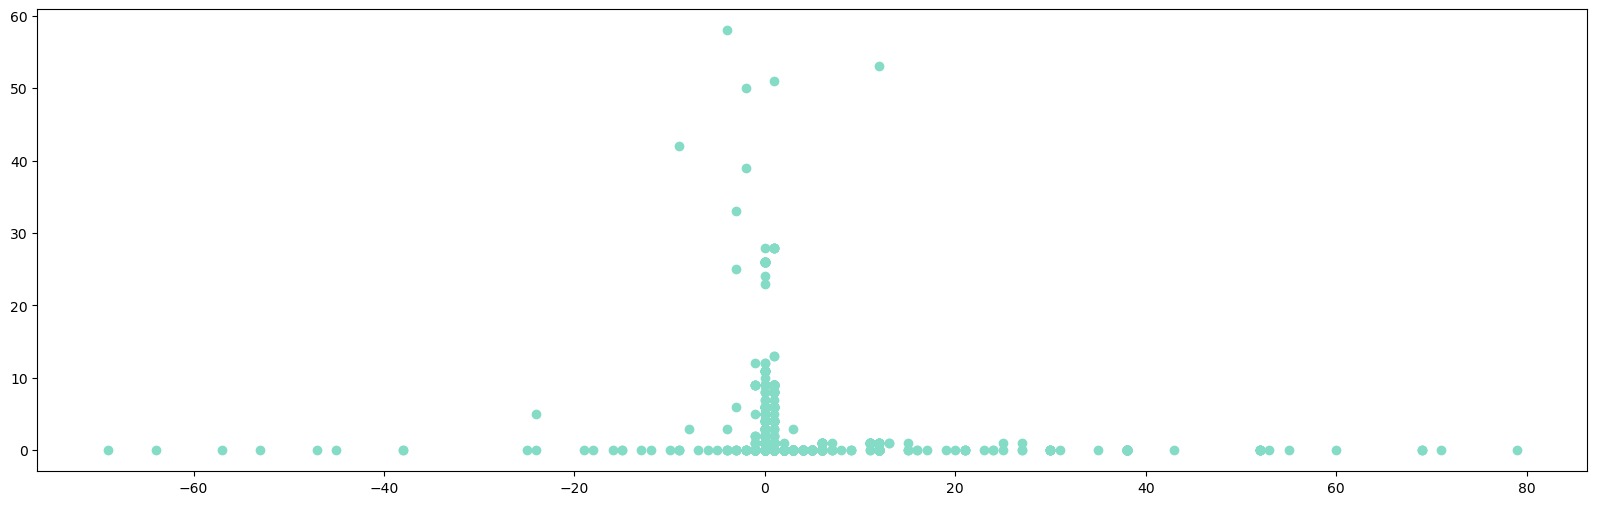

In [282]:
fig, axs = plt.subplots(figsize=(20, 6), ncols=1, nrows=1)

plt.scatter(train['case_positive_specimen_interval'], train['case_onset_interval'], c='#84dcc6')
corr = train['case_onset_interval'].corr(train['case_positive_specimen_interval'])
print('Correlation: ', corr)
print('Weak positive correlation between these two variables.')
plt.show()


## Continuous Features Plotted Against Death

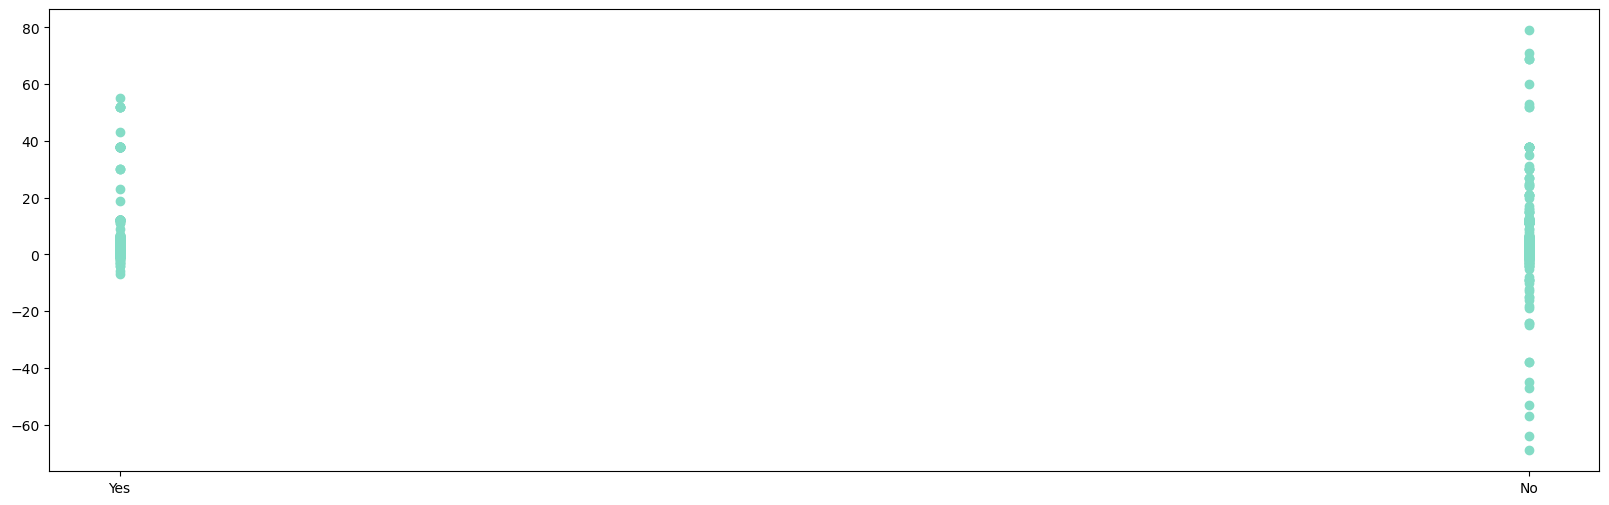

In [283]:
fig, axs = plt.subplots(figsize=(20, 6), ncols=1, nrows=1)
plt.scatter(train['death_yn'], train['case_positive_specimen_interval'], c='#84dcc6')
plt.show()

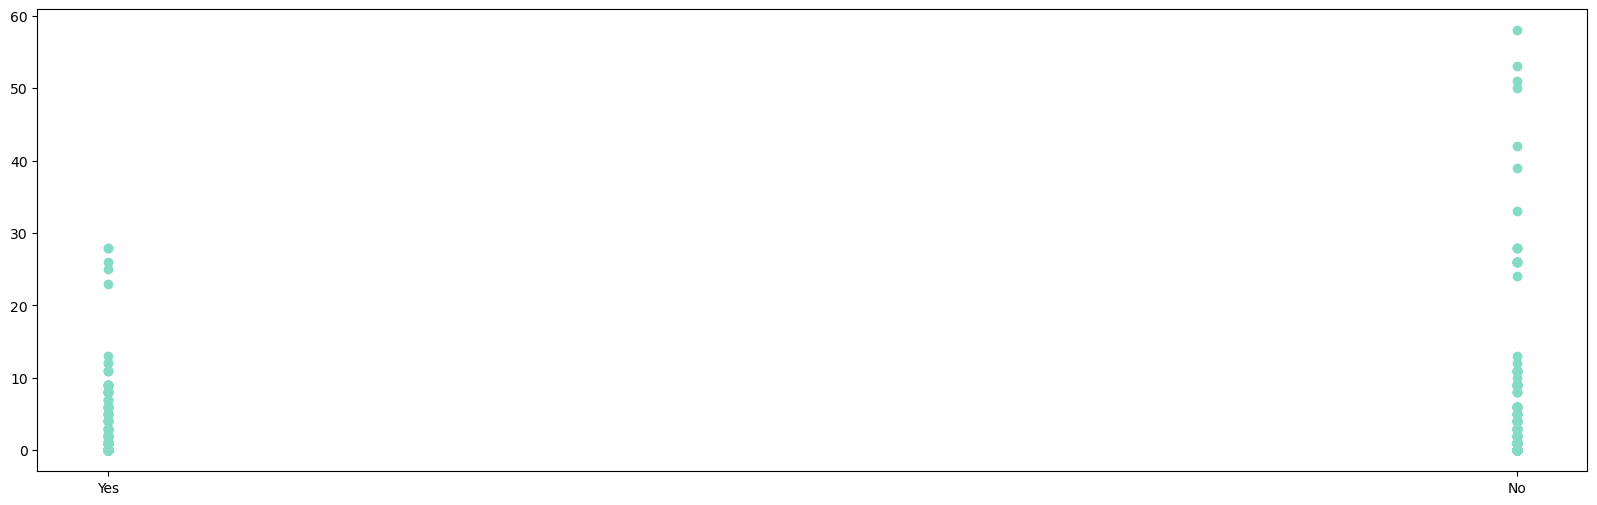

In [284]:
fig, axs = plt.subplots(figsize=(20, 6), ncols=1, nrows=1)
plt.scatter(train['death_yn'], train['case_onset_interval'], c='#84dcc6')
plt.show()

## Health Related Categorical Features Plotted Against Death

Here we are looking discern patterns from our dataset by plotting deaths (yes/no) against a select number of categorical features. The features we are going to examine first are those that relate to the health profile of our patients:

1. When the patient contracted COVID.
2. What US state the patient was in when they were reported of having COVID.
3. What age group the patient belongs to.
4. Whether the patient knew if they were exposed to COVID.
5. Whether or not the patient was hospitalised or not.
6. Whether or not the patient was taken to ICU.
7. And whether or not the patient exhibited underlying conditions which could exacerbate COVID.

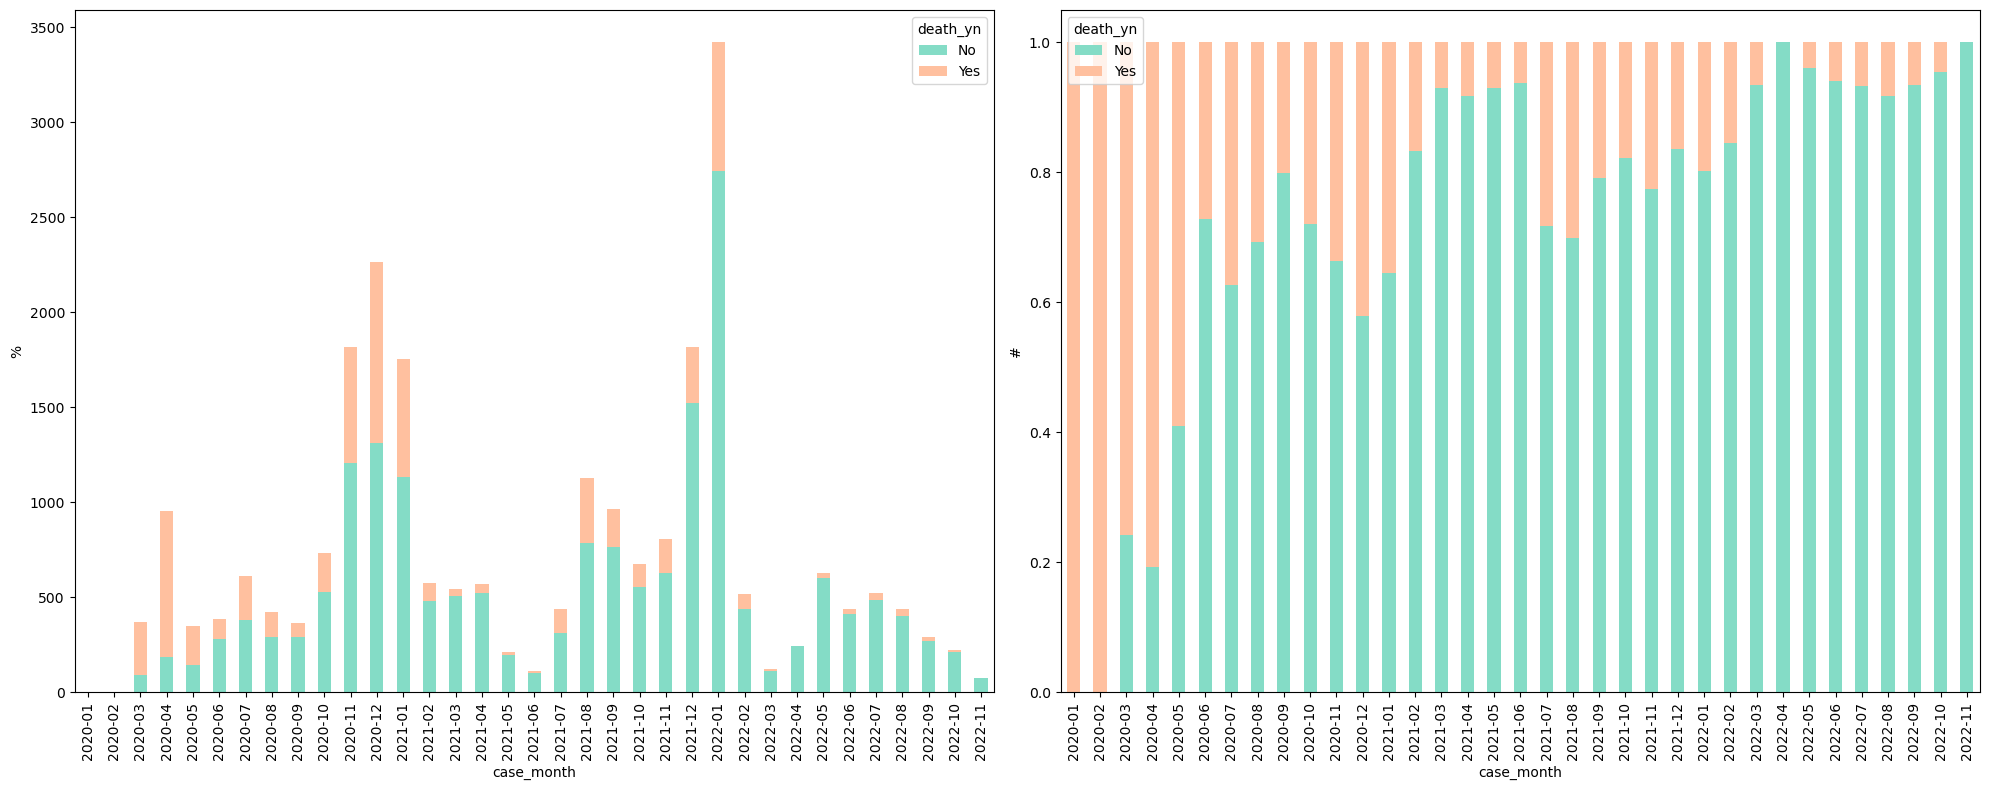

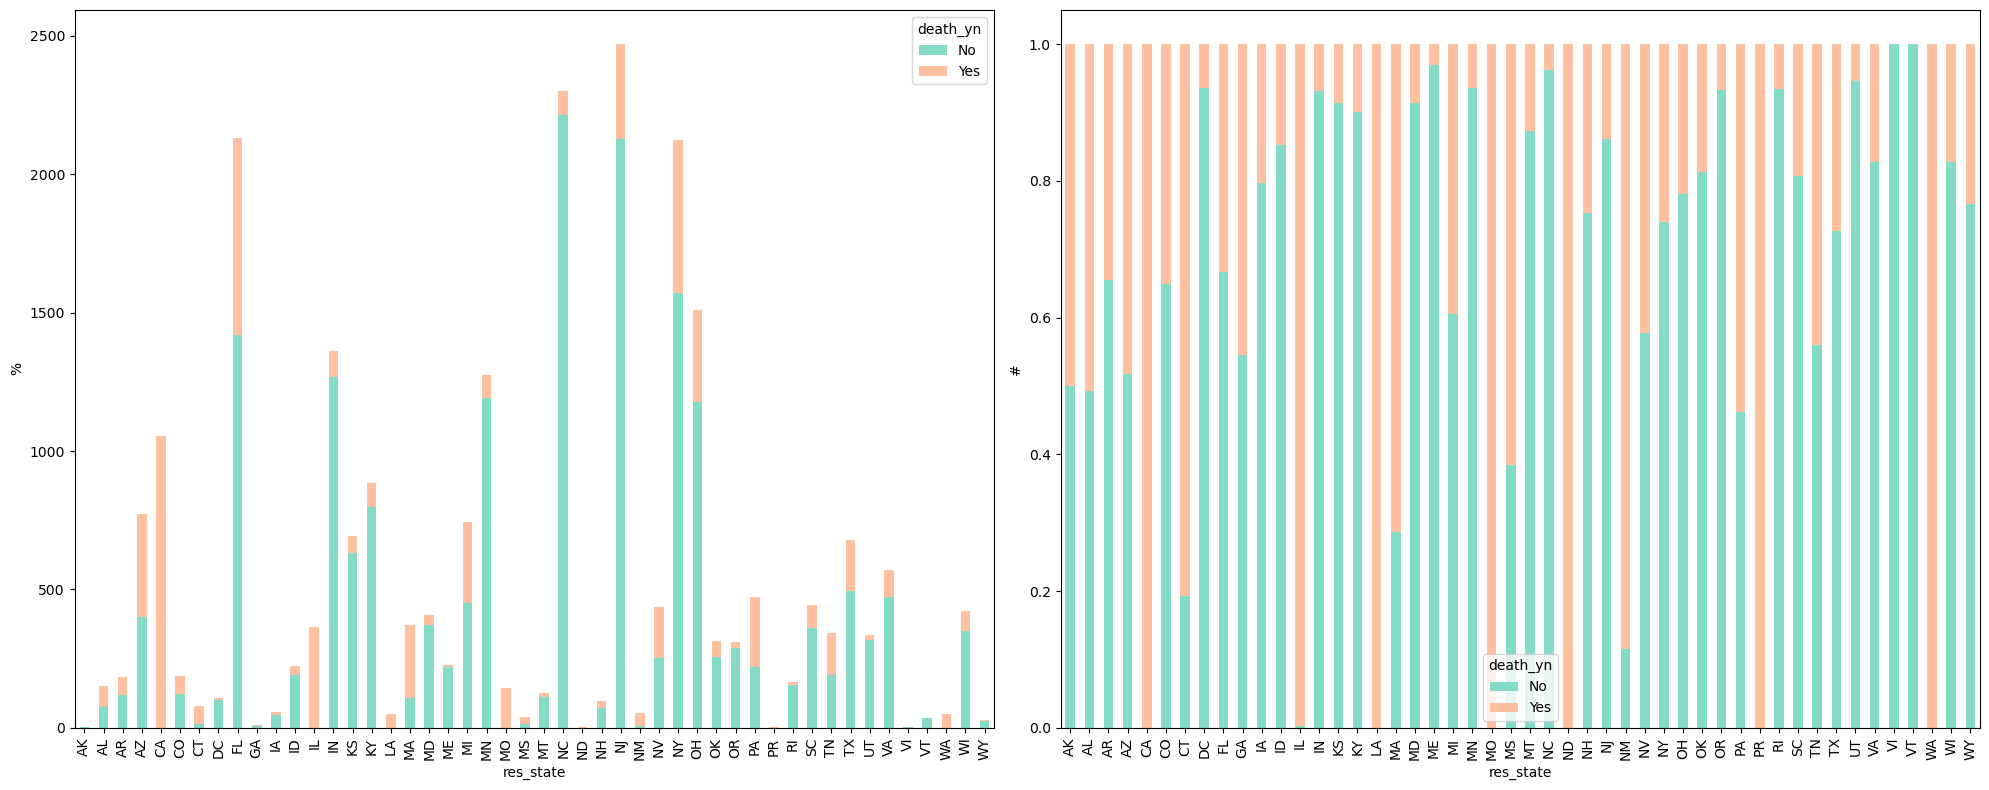

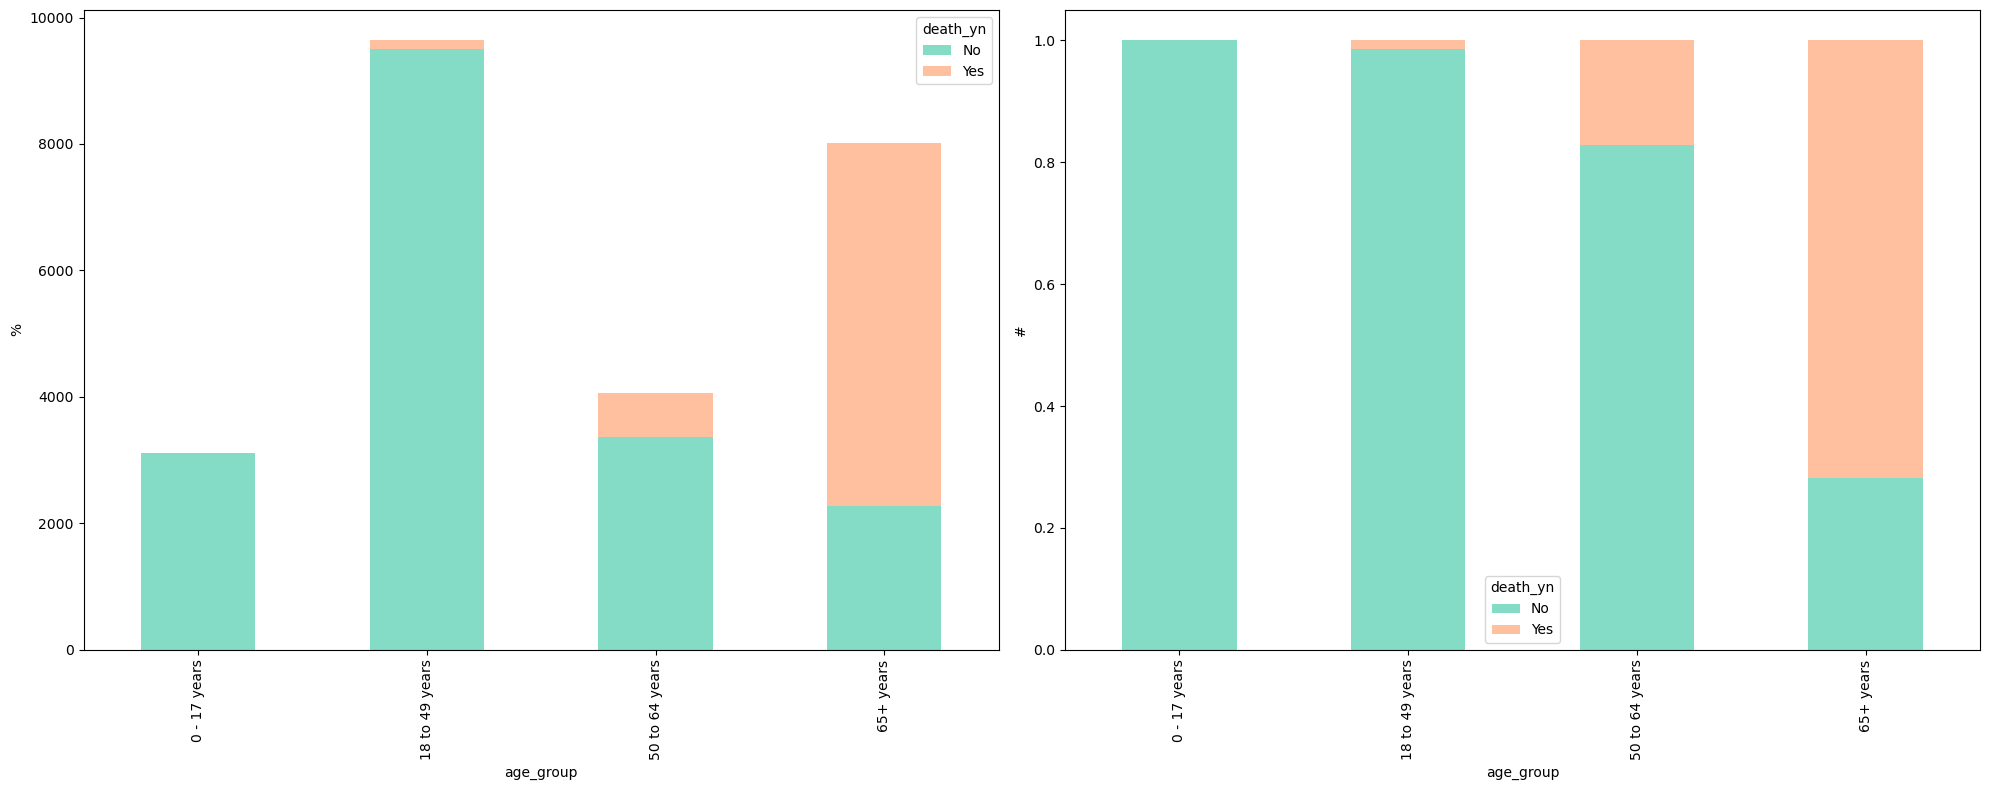

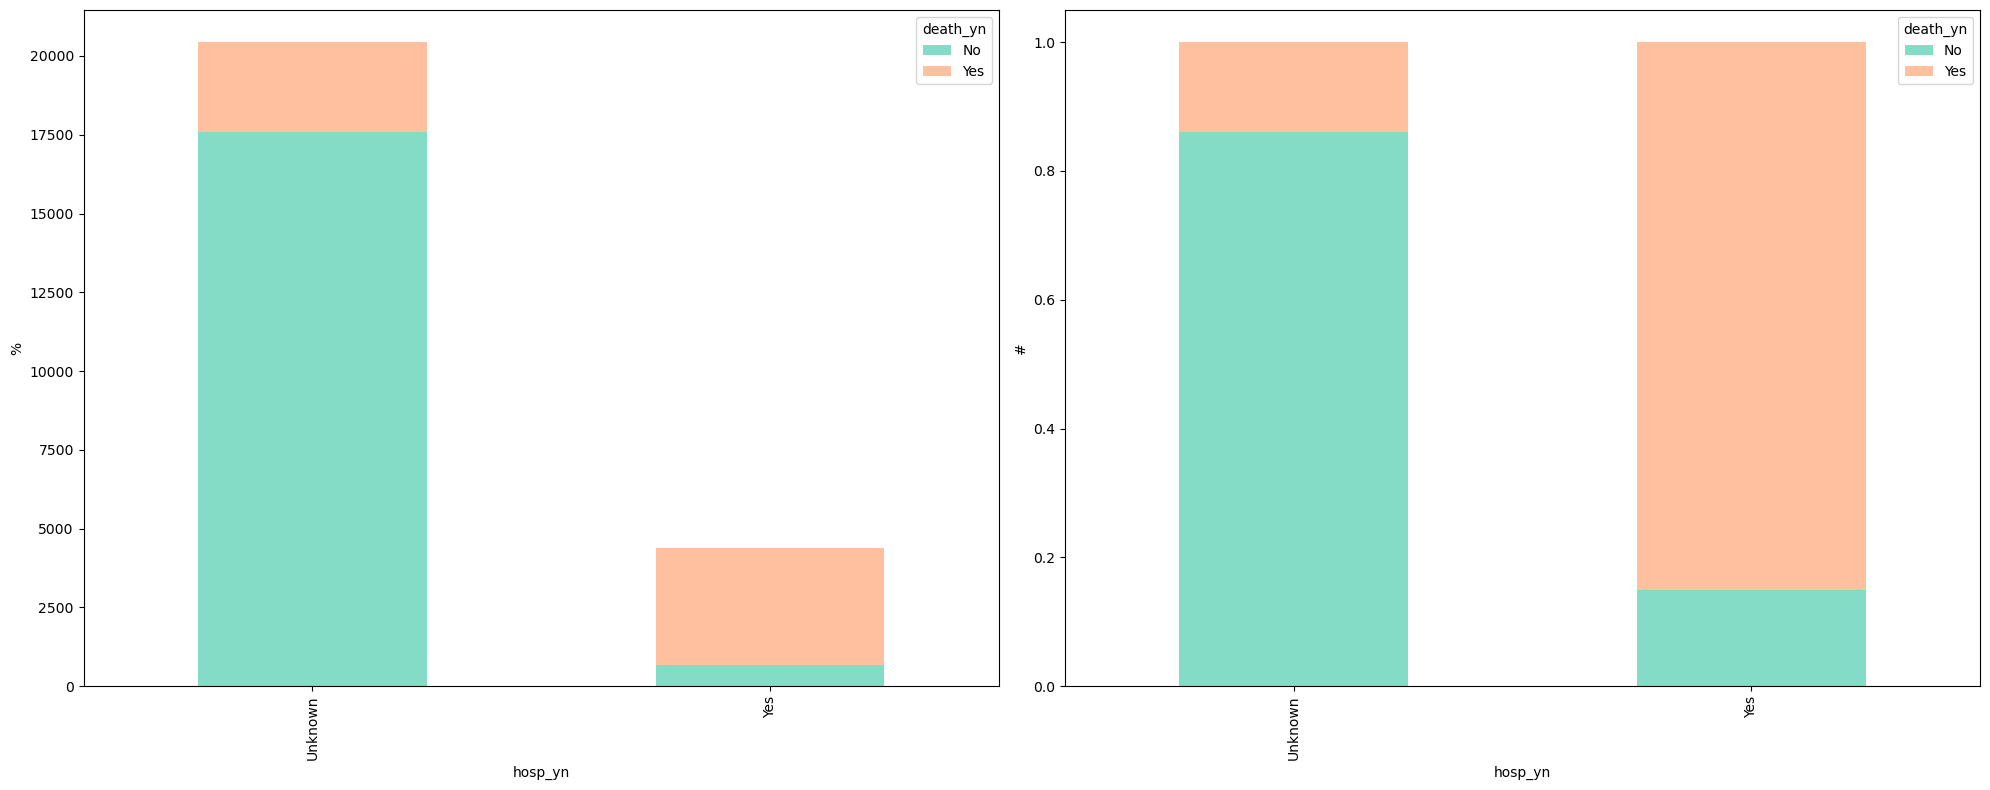

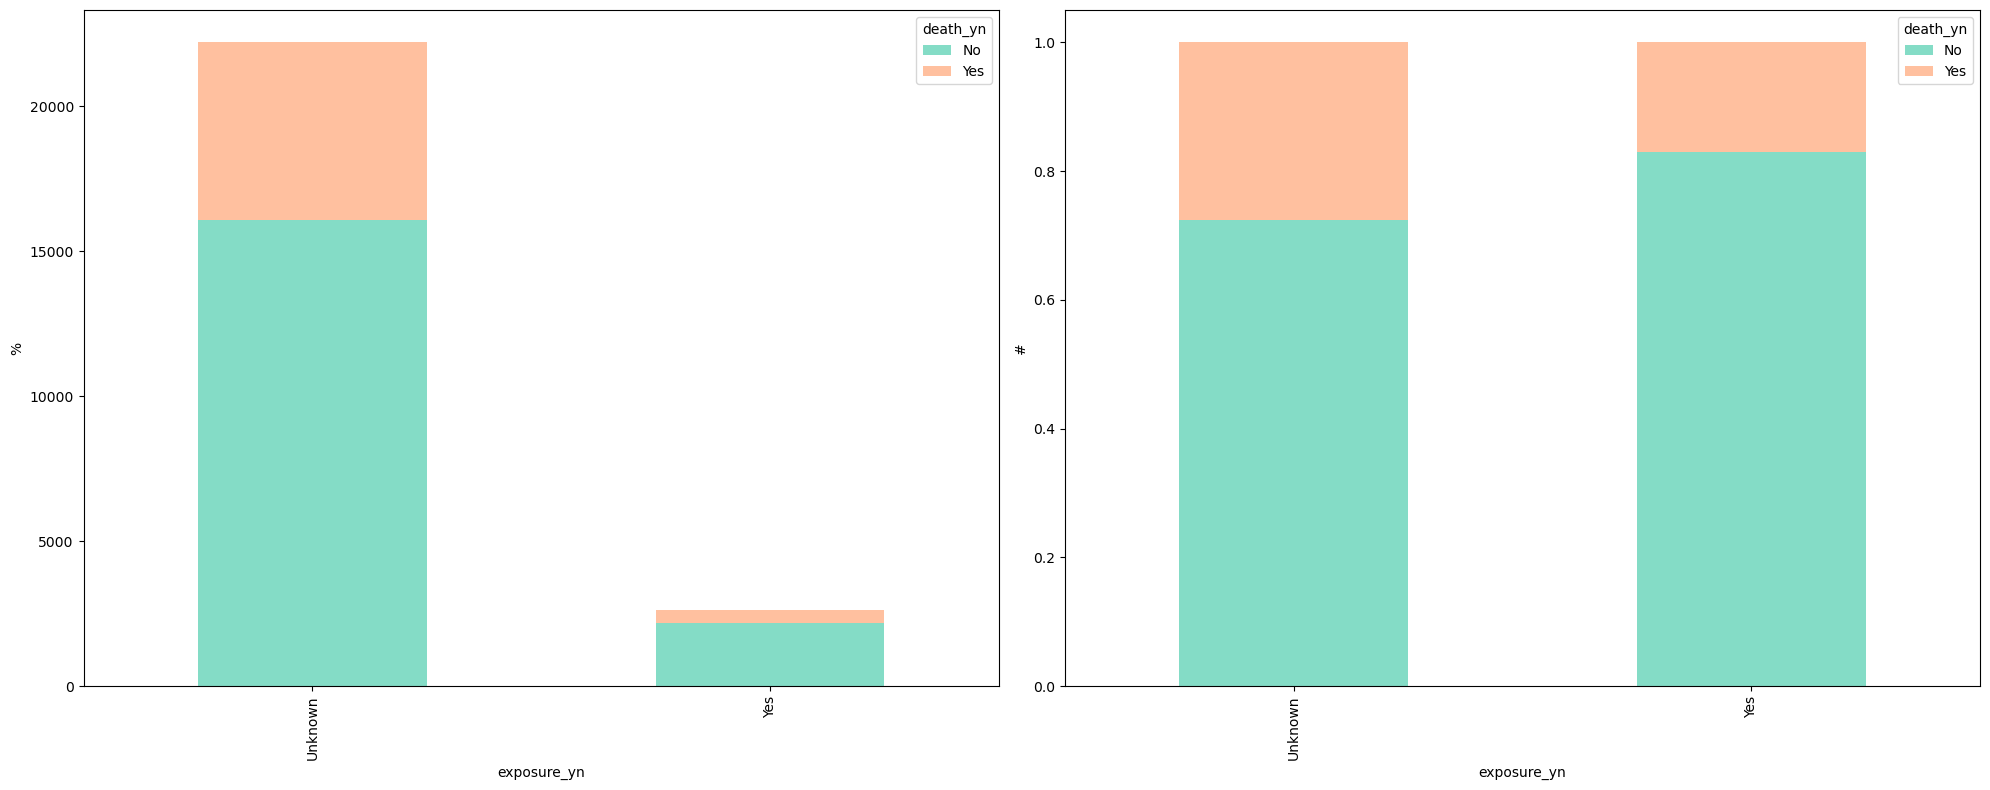

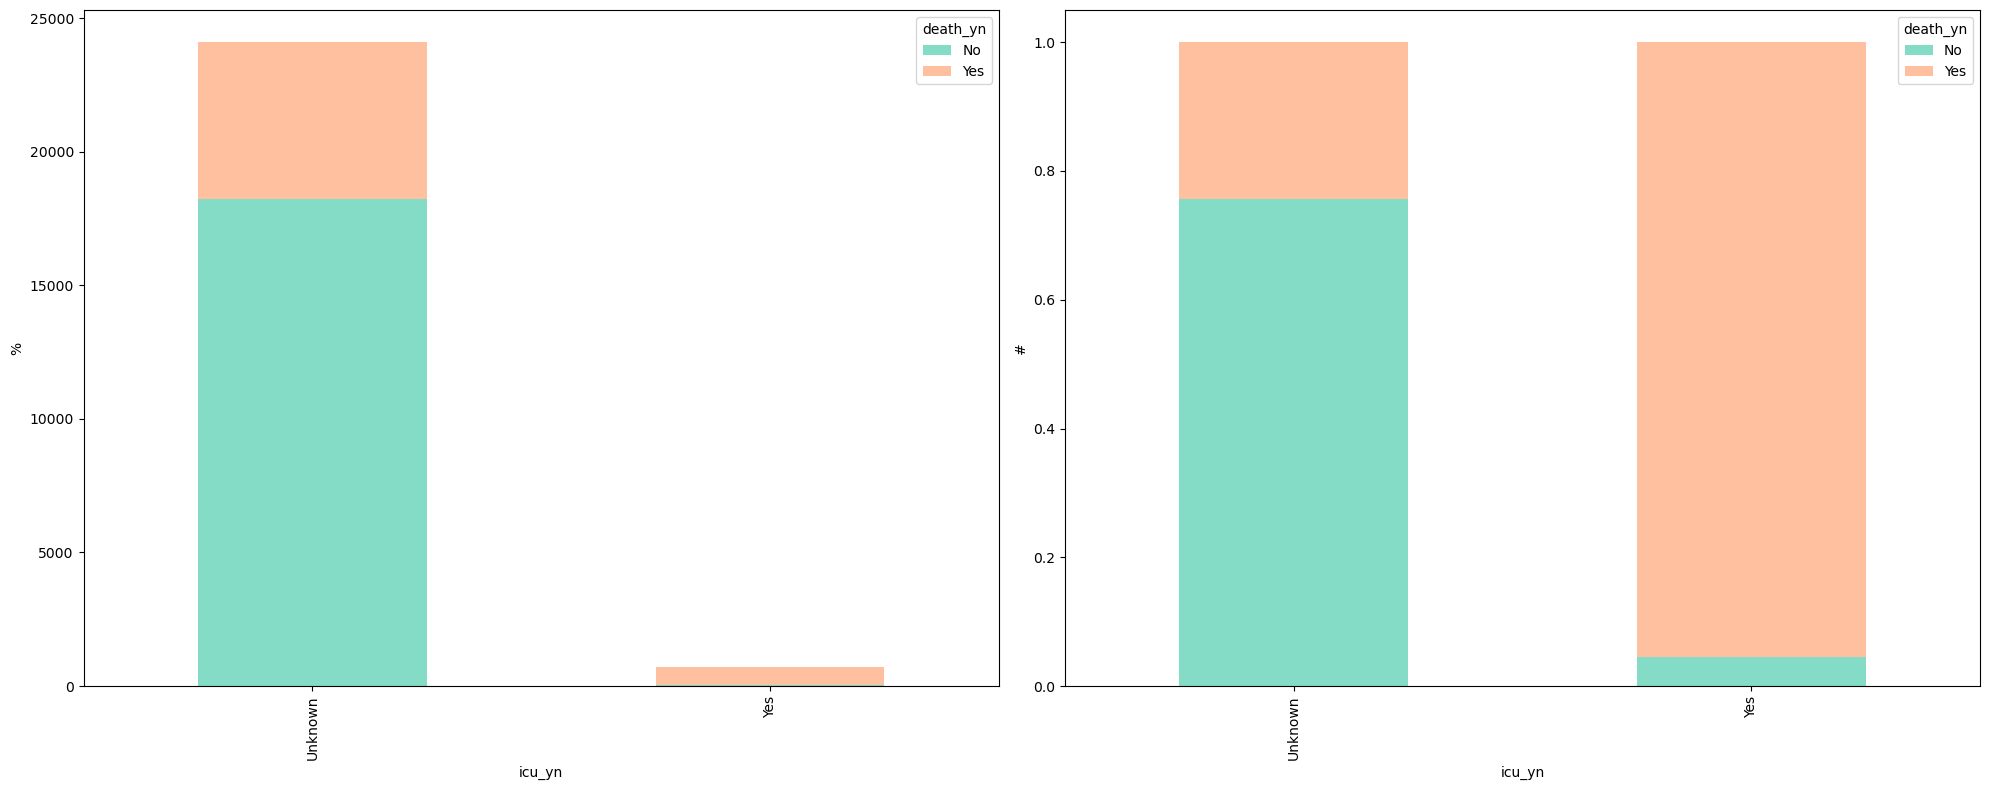

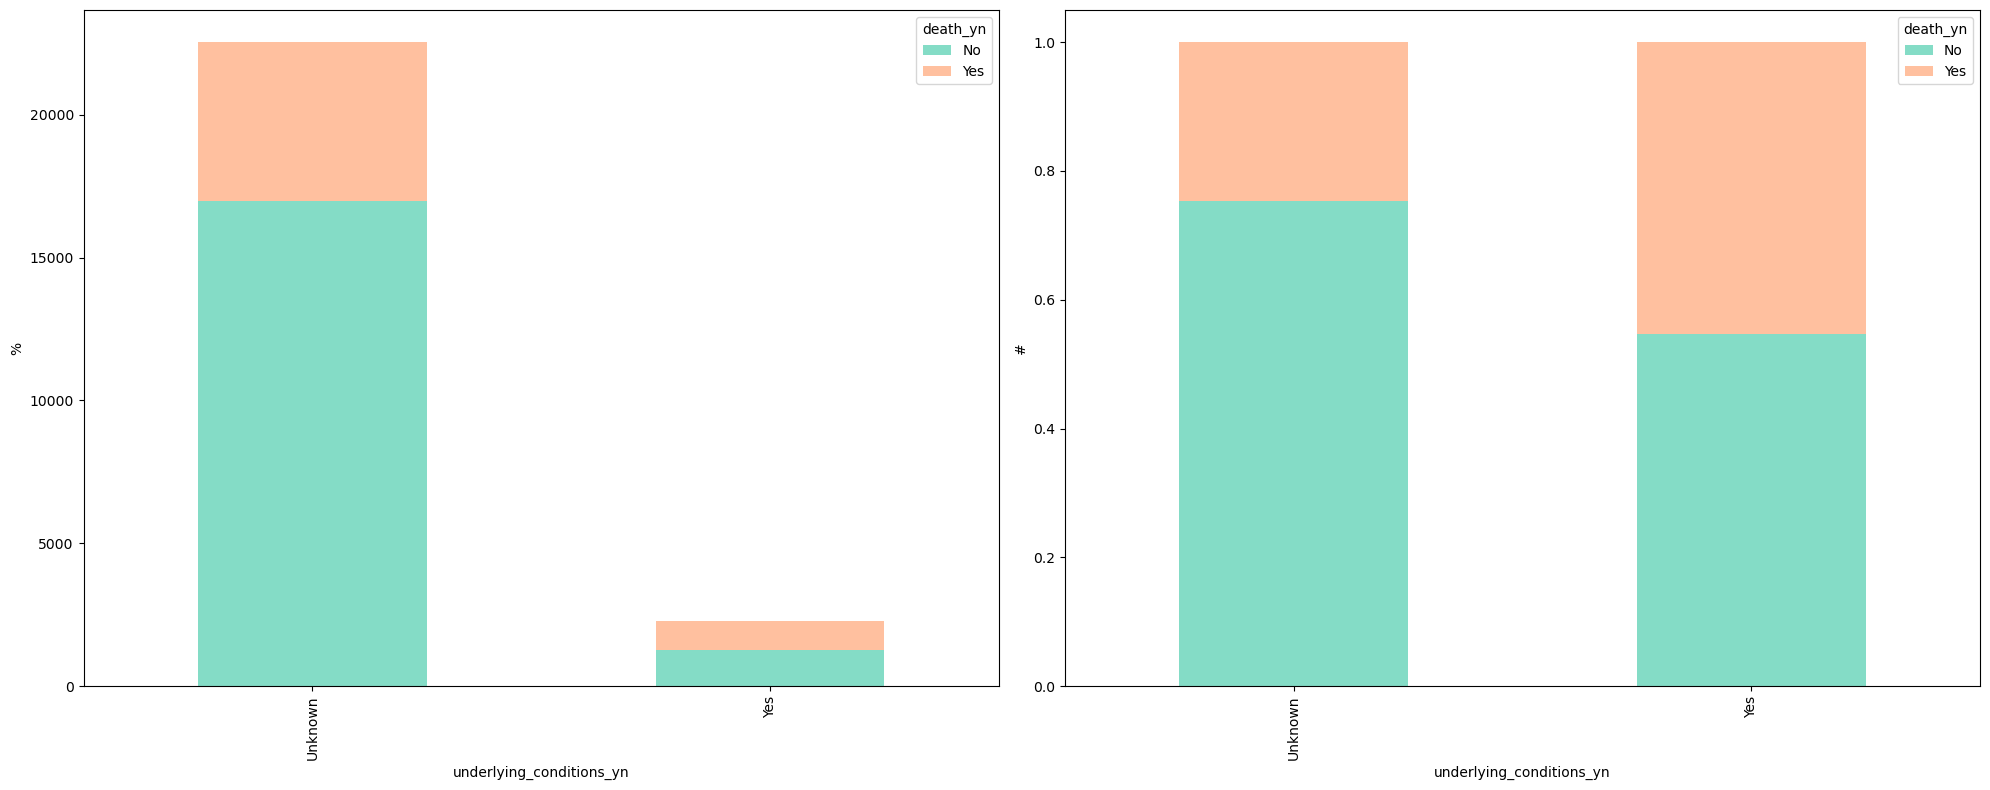

In [285]:
target_feature = train['death_yn']
select_features = [train['case_month'], train['res_state'], train['age_group'], train['hosp_yn'], train['exposure_yn'], train['icu_yn'], train['underlying_conditions_yn']]

colours = ['#84dcc6', '#ffc09f']

for feature in select_features:
  
    fig, axs = plt.subplots(ncols=2, figsize=(20, 8))
    train.groupby([feature, target_feature]).size().unstack().plot(kind='bar', stacked=True, ax=axs[0], color=colours)
    axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90, fontsize=10)
    axs[0].set_ylabel('%')

    train.groupby([feature, target_feature]).size().unstack().apply(lambda x: x/x.sum(), axis=1).plot(kind='bar', stacked=True, ax=axs[1], color=colours)
    axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90, fontsize=10)
    axs[1].set_ylabel('#')
    
    plt.tight_layout()
    plt.show()

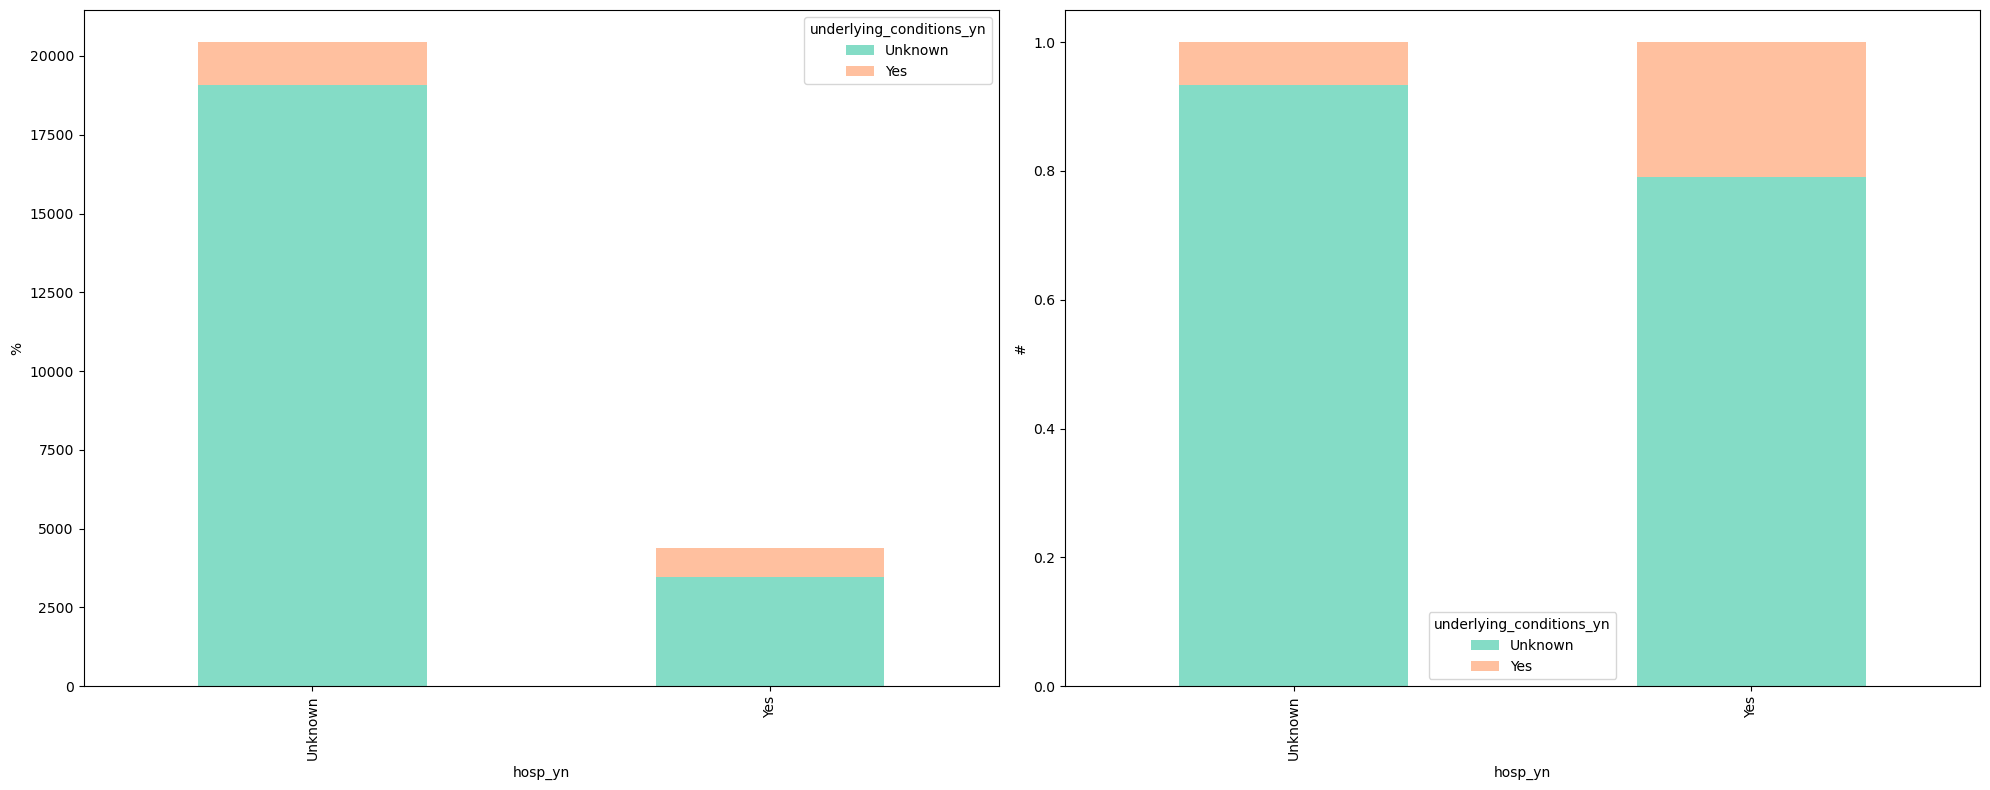

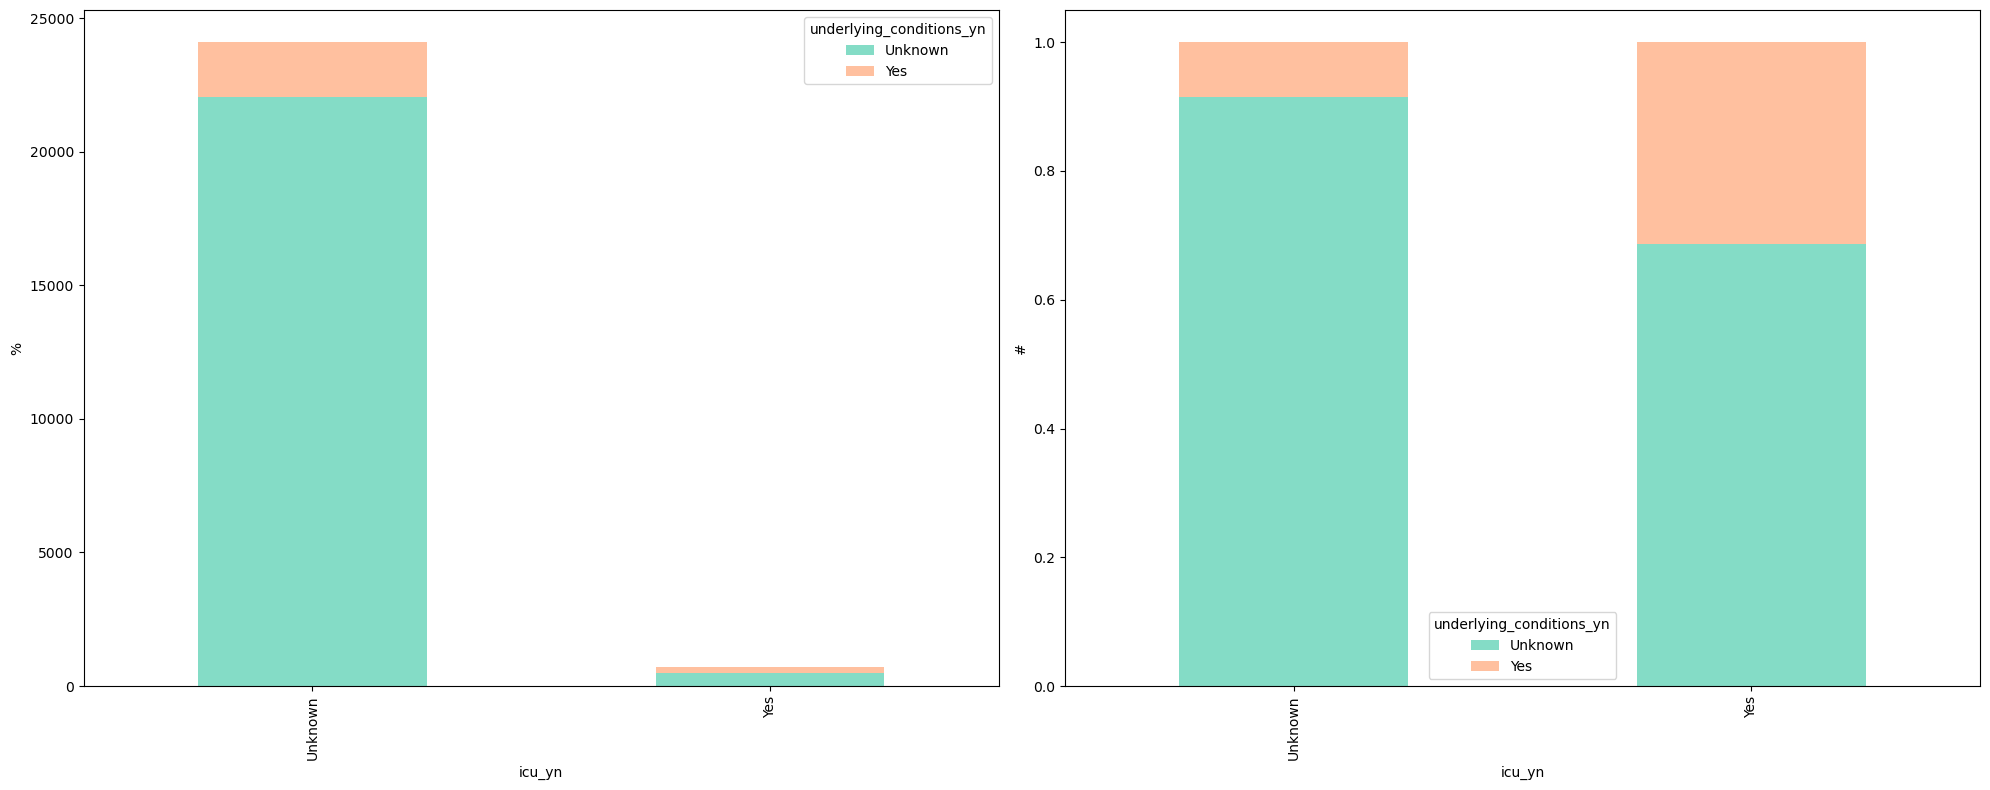

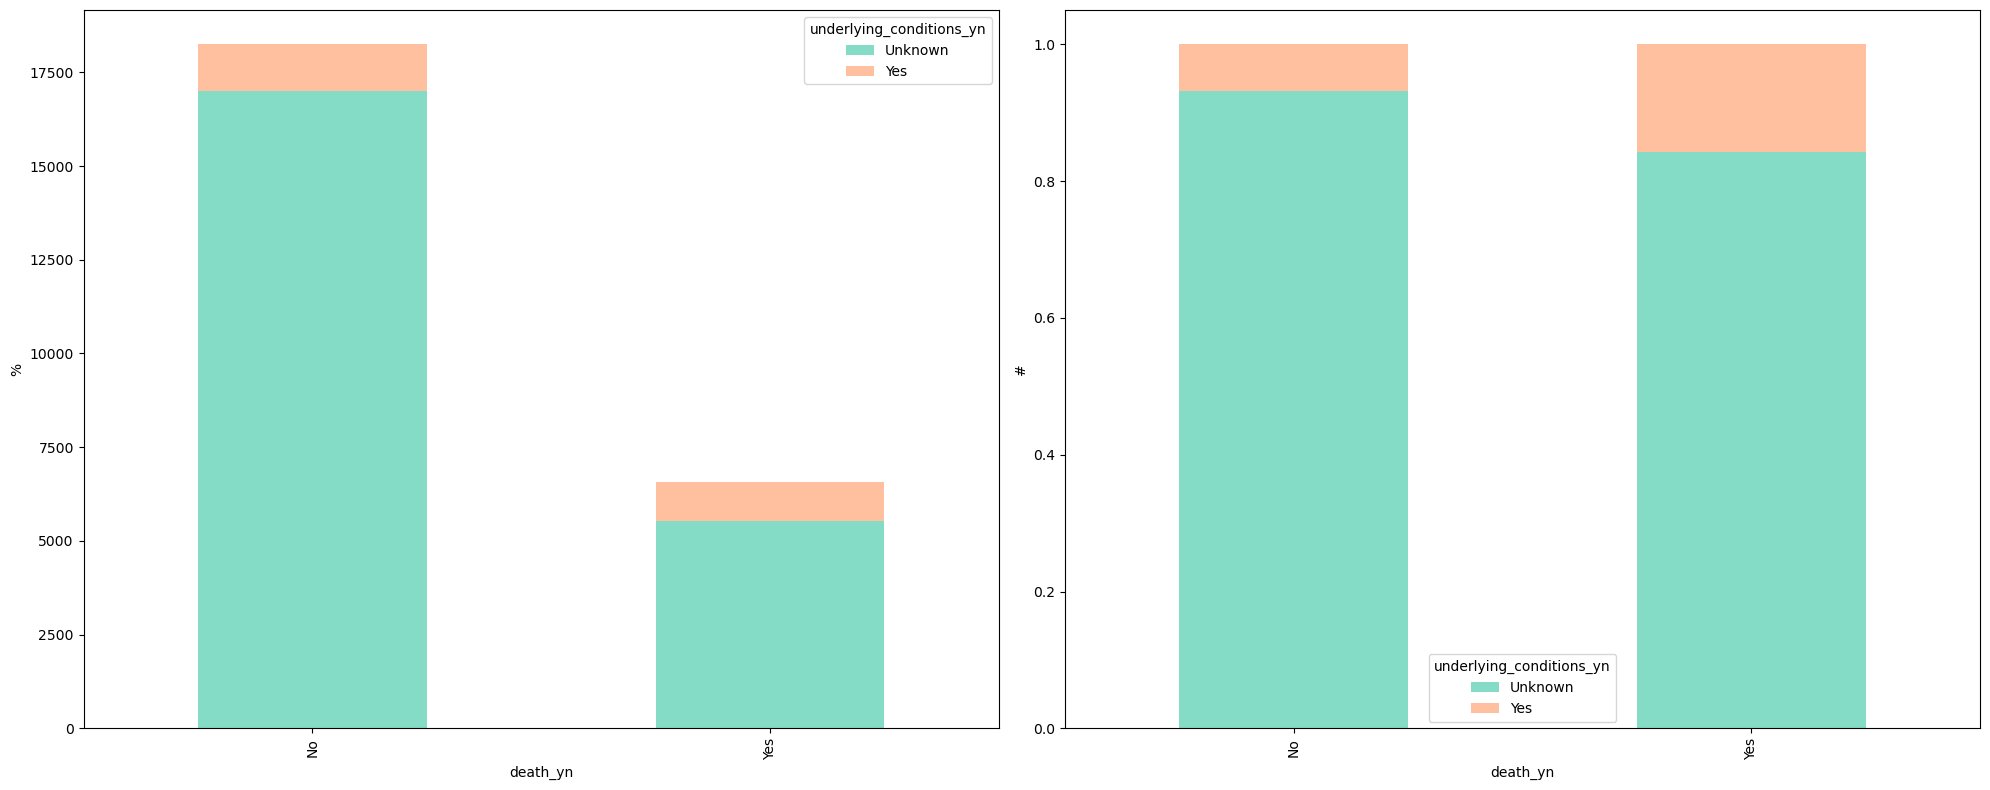

In [286]:
target_feature = train['underlying_conditions_yn']
select_features = [train['hosp_yn'], train['icu_yn'], train['death_yn']]

colours = ['#84dcc6', '#ffc09f']

for feature in select_features:
  
    fig, axs = plt.subplots(ncols=2, figsize=(20, 8))
    train.groupby([feature, target_feature]).size().unstack().plot(kind='bar', stacked=True, ax=axs[0], color=colours)
    axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90, fontsize=10)
    axs[0].set_ylabel('%')

    train.groupby([feature, target_feature]).size().unstack().apply(lambda x: x/x.sum(), axis=1).plot(kind='bar', stacked=True, ax=axs[1], color=colours)
    axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90, fontsize=10)
    axs[1].set_ylabel('#')
    
    plt.tight_layout()
    plt.show()

## Sociological Related Categorical Features Plotted Against Death

Here we are looking discern patterns from our dataset by plotting deaths (yes/no) against a number of sociological features: race, ethnicity, sex.

1. The race of the patient.
2. The ethnicity of the patient.
3. The sex of the patient.

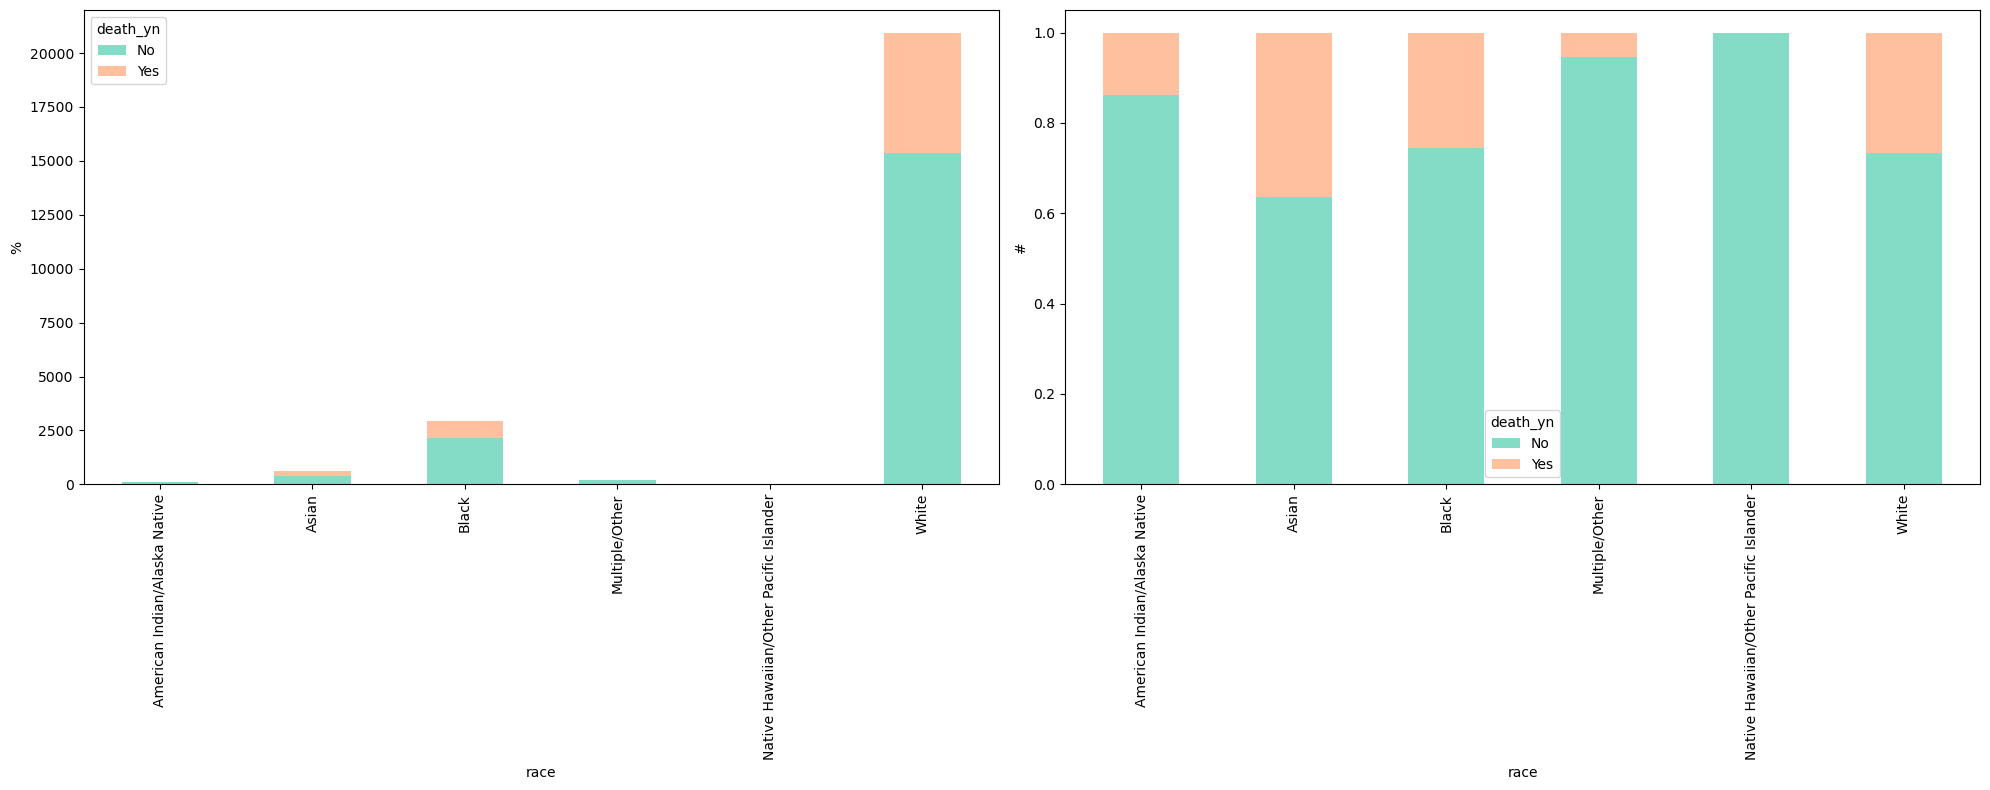

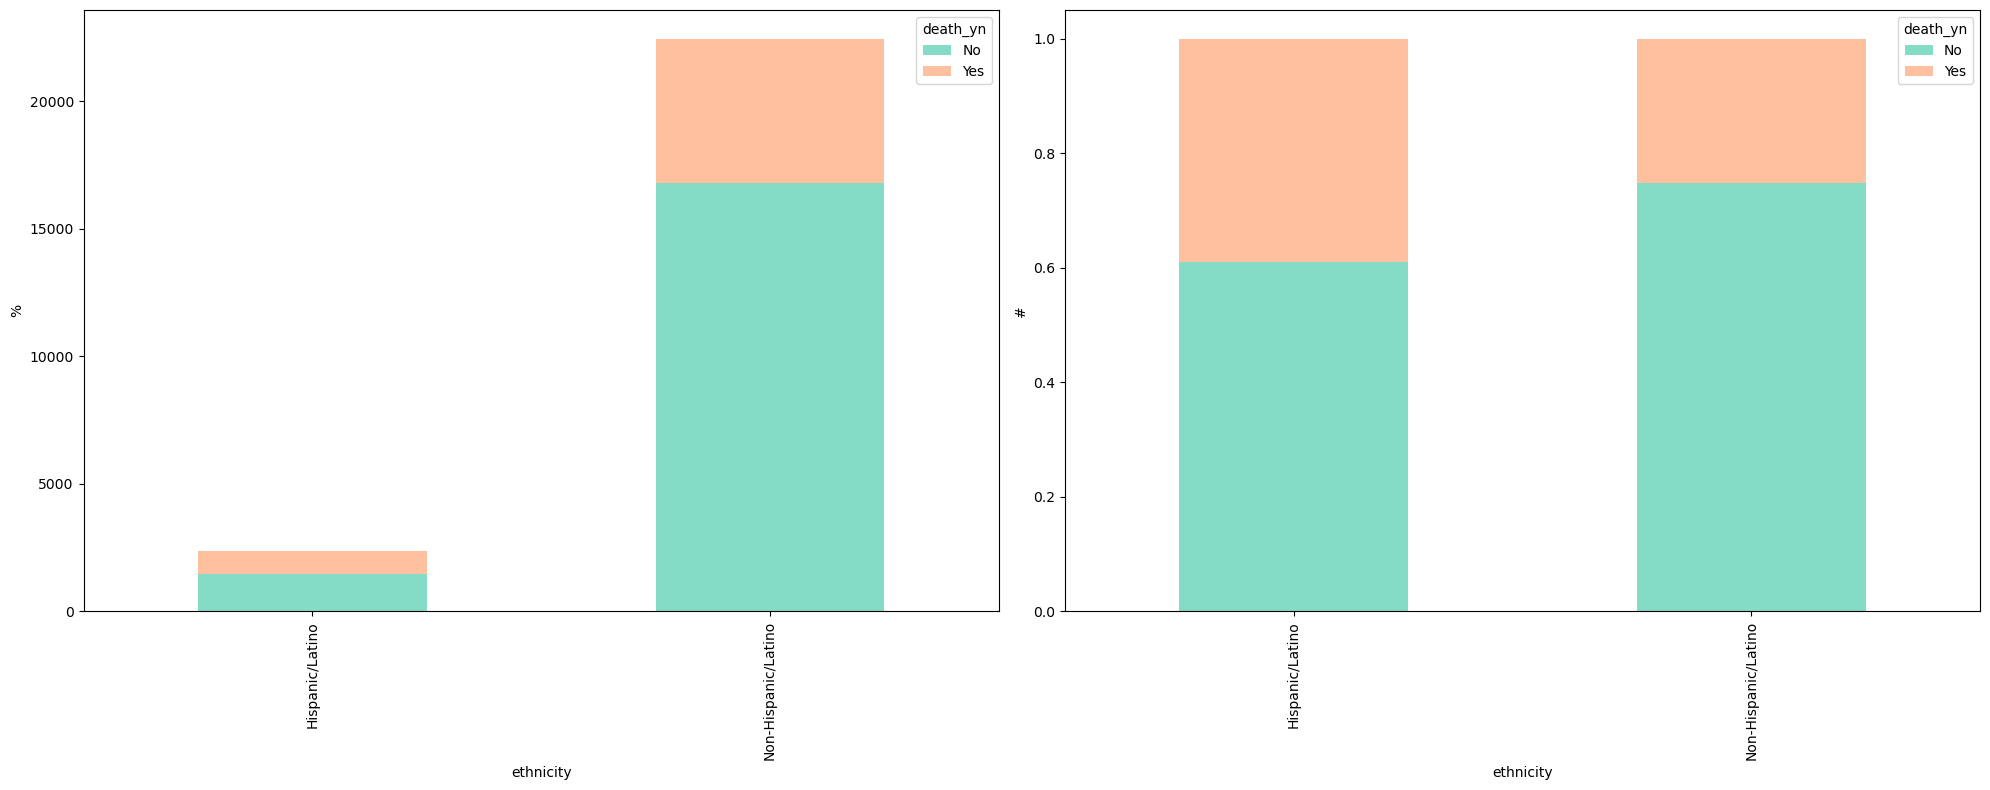

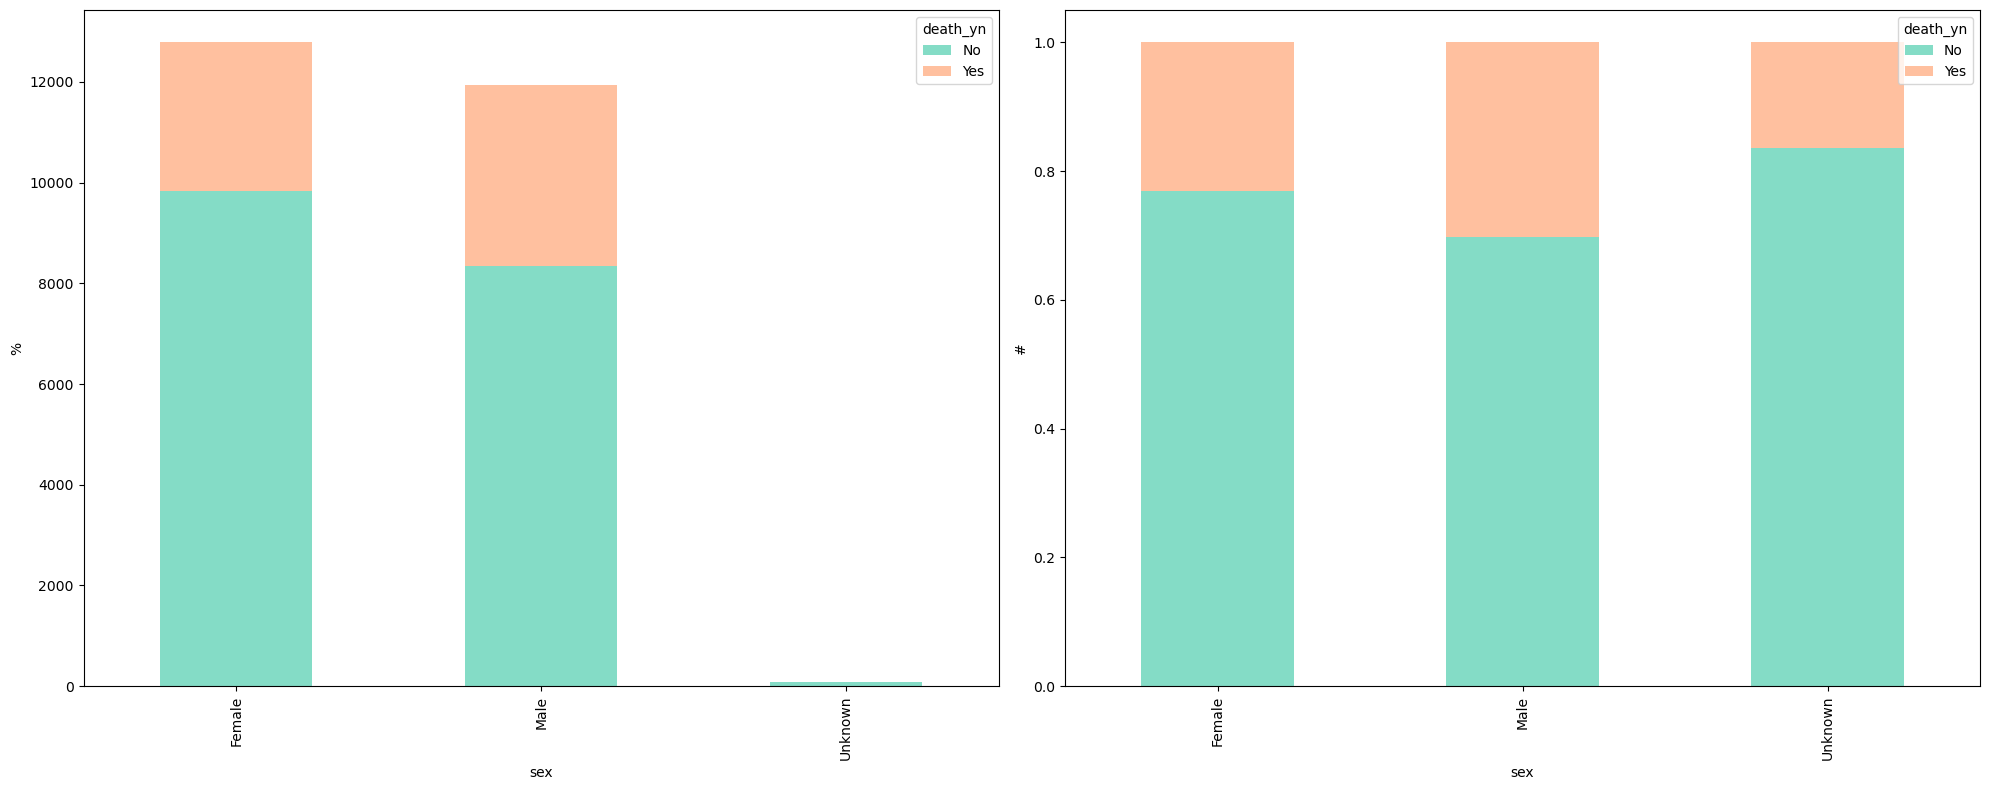

In [287]:

target_features = [train['race'], train['ethnicity'], train['sex']]
select_features = [train['death_yn']]

colours = ['#84dcc6', '#ffc09f']

for target_feature in target_features:

    for feature in select_features:

        fig, axs = plt.subplots(ncols=2, figsize=(20, 8))
        train.groupby([target_feature, feature]).size().unstack().plot(kind='bar', stacked=True, ax=axs[0], color=colours)
        axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90, fontsize=10)
        axs[0].set_ylabel('%')

        train.groupby([target_feature, feature]).size().unstack().apply(lambda x: x/x.sum(), axis=1).plot(kind='bar', stacked=True, ax=axs[1], color=colours)
        axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90, fontsize=10)
        axs[1].set_ylabel('#')
        
        plt.tight_layout()
        plt.show()

## Observations:

1. As the COVID19 pandemic progressed, we can generally observe both a reduction in the number of deaths per month and the proporption of deaths with regards the whole, month-on-month. The outlier here is January 2022. From the CDC dataset provided, we cannot discern whether or not the patient was vaccinated, however we can use the months here as a proxy for the Vaccine rollout program in the US, which began mid-December 2020 and had more or less concluded by the end of the following year. The death ratio falling against total cases broadly follows the vaccination rollout scheme, despite this information not formally recorded in our dataset. Anecdotally, as COVID19 pandemic persisted more and more COVID mutations occured, often leading the new dominant COVID virus to be more transmissible at the expense of its lethality.

2. The data also suggests that age is a predominant and robust factor when gauging the impact contracting COVID will have on your health. Our data shows that those who belong to the oldest age bracket (65+) and test positive for COVID are far more likely to die than those who are younger (compare 65+ against 0-17 years old). Our data also shows that those who are older are more exposed to the risk of COVID, in that the oldest age bucket leads in terms of hospitalisations, ICU admissions, and underlying conditions in comparison to the other age brackets. This aligns with what is now known about COVID-19, that older adults and those with underlying health conditions are considered to be at a higher risk of severe illness and death from COVID-19. 

3. The data also demonstrates that having underlying medical conditions increases the risk of hospitalisation, ICU admission, and death from COVID-19. And while we do not get access to the comorbidities affecting the patients in our dataset, those who reported as having underlying conditions such as diabtes, hypertension, obesity (etc.), confer a much higher risk of death from COVID-19 than others.

4. The data also shows that in the event of being admitted to hospital or the ICU, the success of making a full recovery is limited, and drasticly decreases the older you are. The data also proves the opposite whereby the younger you are the more resilient you are to COVID, leading to far fewer hospitalisation, admissions to ICU, and deaths. 

5. The data also shows that minorities, categorised in our race and ethnicity features (Black, Hispanic, Asian), are hospitalised, admitted to ICU, and die more regularly than their white counterparts pro rata. Without more granular information on our patient it is hard to say exactly what factors are driving these disparities: access to healthcare; wealth; etc.,

6. The data also demonstrates that there is a weak correlation between case_onset_intervals and case_positive_specimen_intervals, with the correlation coefficient is close to zero. This indicates that the timing of when a person experiences symptoms (case onset interval) and when they test positive for COVID-19 (case positive specimen interval) are not strongly associated with each other.

7. Our data also shows that there is a weak negative correlation between our continuous features, and when we map these continuous features against our target feature, there is no real discernible pattern that differents yes from no.


## Selected Features

Based on the above observations, the subset of features we are going to use to model the health profile of our patients are: 

i. <b>Age Group</b>, 
ii. <b>Case Month</b>, 
iii. <b>Hospilisation Status</b>, 
iv. <b>ICU Status</b>, 
v. <b>Underlying conditions</b>. 

Let's transform these features into new features with discrete values so we can use them in our models.

#### Case Month

In [288]:
month_map = {'2020-01': 0, 
             '2020-02': 1, 
             '2020-03': 2, 
             '2020-04': 3,
             '2020-05': 4,
             '2020-06': 5,
             '2020-07': 6,
             '2020-08': 7,
             '2020-09': 8,
             '2020-10': 9,
             '2020-11': 10,
             '2020-12': 11,
             '2021-01': 12,
             '2021-02': 13,
             '2021-03': 14,
             '2021-04': 15,
             '2021-05': 16,
             '2021-06': 17,
             '2021-07': 18,
             '2021-08': 19,
             '2021-09': 20,
             '2021-10': 21,
             '2021-11': 22,
             '2021-12': 23,
             '2022-01': 24,
             '2022-02': 25,
             '2022-03': 26,
             '2022-04': 27,
             '2022-05': 28,
             '2022-06': 29,
             '2022-07': 30,
             '2022-08': 31,
             '2022-09': 32,
             '2022-10': 33,
             '2022-11': 34
             }

train['case_month'] = train['case_month'].map(month_map)
test['case_month'] = test['case_month'].map(month_map)

#### Age Group

In [289]:
age_map = {'0 - 17 years': 0, 
           '18 to 49 years': 1, 
           '50 to 64 years': 2, 
           '65+ years': 3
           }

train['age_group'] = train['age_group'].map(age_map)
test['age_group'] = test['age_group'].map(age_map)

#### Hospitalisation 

In [290]:
hosp_map = { 'Unknown': 0, 
            'Yes': 1, 
            }

train['hosp_yn'] = train['hosp_yn'].map(hosp_map)
test['hosp_yn'] = test['hosp_yn'].map(hosp_map)

#### ICU 

In [291]:
icu_map = {'Unknown': 0, 
            'Yes': 1, 
            }

train['icu_yn'] = train['icu_yn'].map(icu_map)
test['icu_yn'] = test['icu_yn'].map(icu_map)

#### Underlying Conditions

In [292]:
underlying_map = {'Unknown': 0, 
                  'Yes': 1, 
                }

train['underlying_conditions_yn'] = train['underlying_conditions_yn'].map(underlying_map)
test['underlying_conditions_yn'] = test['underlying_conditions_yn'].map(underlying_map)

In [293]:
# train['definite_underlying'] = (train['underlying_conditions_yn'] == 1).astype(int)
# train['uncertain_underlying'] = (train['underlying_conditions_yn'] == 0).astype(int)

# test['definite_underlying'] = (test['underlying_conditions_yn'] == 1).astype(int)
# test['uncertain_underlying'] = (test['underlying_conditions_yn'] == 0).astype(int)

#### Death

In [294]:
death_map = {'No': 0,
             'Yes': 1,
             }

train['death_yn'] = train['death_yn'].map(death_map)
test['death_yn'] = test['death_yn'].map(death_map)

# Task 2: Predictive Modeling - Linear Regression

The aim of this task is to perform some basic predictive analysis on the data prepared in task one. To this end, a linear regression model will be created using the training data yielded by the train-test split from the previous task. The features to be analyzed in this section are:

i. <b>age</b>, 
ii. <b>case month</b>, 
iii. <b>hospilisation status</b>, 
iv. <b>ICU status</b>, 
v. <b>underlying conditions</b>. 

 The model will then be evaluated based on its performance using the training data, the test data, and other linear regression models trained on the full dataset. 

## 2.1

Here we train our linear regression model based on the features we selected above. We train this model against our target feature which is death.

In [295]:
linear_regression_x_train = train[['case_month', 'age_group', 'hosp_yn', 'icu_yn', 'underlying_conditions_yn']]
linear_regression_y_train = train['death_yn']

linear_regression_x_test = test[['case_month', 'age_group', 'hosp_yn', 'icu_yn', 'underlying_conditions_yn']]
linear_regression_y_test = test['death_yn']

Sanity checking feature selection for model

In [296]:
print(linear_regression_x_train.shape)
print(linear_regression_x_test.shape)

(24825, 5)
(10640, 5)


In [297]:
lr = LinearRegression()
lr.fit(linear_regression_x_train, linear_regression_y_train)
linear_regression_y_pred = lr.predict(linear_regression_x_train)

## 2.2

Here we print the coefficients of each feature we used to train the model

In [298]:
lr_coeff = pd.DataFrame({'Feature': linear_regression_x_train.columns, 'Coeff': lr.coef_})
lr_coeff.reset_index(drop=True, inplace=True)
lr_coeff

,Feature,Coeff
0,case_month,-0.006671
1,age_group,0.198640
2,hosp_yn,0.413565
3,icu_yn,0.147415
4,underlying_conditions_yn,-0.056807


### Observations:

1. <b>Case Month</b>: The coefficient for Case Month is -0.006671, which indicates that there is a small negative correlation between the month of the reported case and the target variable. That is to say that as the month of the reported case increases, the value of the target variable is expected to decrease slightly. This makes sense as we can understand time here to be a proxy (of sorts) for vaccination and the decreasing lethality of COVID19 as it mutated over the course of 34 months.

2. <b>Age Group</b>: The coefficient for this feature is 0.198640, which indicates a positive correlation between the age group and the target variable. In other words, as the age group of the patient increases, the value of the target variable is expected to increase. This follows the trends we observe from our dataset where the older the patient the more likely they are of dying from COVID19.

3. <b>Hospitlisation Status</b>: This feature represents whether the patient was hospitalised for COVID19 or not. As we might expect, the coefficient for this feature is relatively high at 0.413565, which demonstrates a strong positive correlation between hospitalisation and the target variable, death. 

4. <b> ICU Status </b>: Represents whether the patient was admitted to the ICU or not. The coefficient for this feature is 0.147415, which indicates a relatively strong positive correlation between ICU admission and our target variable, but not as strong as hospitalisation. However, we can understand this feature as a subset of hospilisation, as 99.8% of our patients who were admitted to ICU were first hospitalised, which in part can help us understand why this value is weighted less than hospitalisation.

5. <b> Underlying Health Conditions </b>: The coefficient for this feature is confusing at the model infers a negative correlation to having underlying health conditions. This finding is counterintuitive, as individuals with underlying health conditions are often thought to be at higher risk for adverse outcomes such as hospitalisation or death from COVID-19. However, it is important to remember that the coefficient represents the association between the predictor variable and the target outcome after accounting for the effects of other predictor variables in the model. In this case, it is possible that other predictor variables, such as age or hospitalisation status, may be more strongly associated with the target outcome than underlying health condition, and that the effect of underlying health condition on the target outcome is actually negative when these other factors are taken into account. Therefore, the negative coefficient for "definite_underlying" suggests that the presence of a definite underlying health condition alone may not be a strong predictor of the target outcome in this model.

## 2.3.1

Here we print the predicted target feature value for the first 10 training examples, and the predicted class for the first 10 training examples.

In [299]:
# predict target feature values for first 10 training examples
linear_regression_y_train_pred_10 = lr.predict(linear_regression_x_train[:10])
y_train_pred_df = pd.DataFrame({'Predicted target feature values': linear_regression_y_train_pred_10})

# threshold predicted target feature values to get predicted classes
linear_regression_y_train_pred_class_10 = (lr.predict(linear_regression_x_train[:10]) > 0.5).astype(int)
y_train_pred_df['Predicted class'] = linear_regression_y_train_pred_class_10

print(y_train_pred_df)

   Predicted target feature values  Predicted class
0                         0.209005                0
1                         0.854565                1
2                        -0.046441                0
3                         0.961302                1
4                        -0.061525                0
5                         0.090418                0
6                         0.484259                0
7                        -0.154919                0
8                        -0.019757                0
9                         0.854565                1


## 2.3.2

Below we print the classification evaluation measures computed on the full training set.

In [300]:
# evaluate model on full training set
linear_regression_y_train_pred = lr.predict(linear_regression_x_train)

linear_regression_y_train_pred_class = (linear_regression_y_train_pred > 0.5).astype(int)

linear_regression_accuracy_train = accuracy_score(linear_regression_y_train, linear_regression_y_train_pred_class)
linear_regression_confusion_train = confusion_matrix(linear_regression_y_train, linear_regression_y_train_pred_class)
linear_regression_precision_train = precision_score(linear_regression_y_train, linear_regression_y_train_pred_class)
linear_regression_recall_train = recall_score(linear_regression_y_train, linear_regression_y_train_pred_class)
linear_regression_f1_train = f1_score(linear_regression_y_train, linear_regression_y_train_pred_class)
linear_regression_mse = mean_squared_error(linear_regression_y_train, linear_regression_y_train_pred_class)
linear_regression_r2 = r2_score(linear_regression_y_train, linear_regression_y_train_pred_class)

print("\nEvaluation metrics on the training set:")
print()
print("Accuracy: {:.2f}".format(linear_regression_accuracy_train))
print("Confusion matrix:\n", linear_regression_confusion_train)
print("Precision: {:.2f}".format(linear_regression_precision_train))
print("Recall: {:.2f}".format(linear_regression_recall_train))
print("F1 score: {:.2f}".format(linear_regression_f1_train))
print("MSE: {:.2f}".format(linear_regression_mse))
print("R^2: {:.2f}".format(linear_regression_r2))


Evaluation metrics on the training set:

Accuracy: 0.89
Confusion matrix:
 [[17437   811]
 [ 1992  4585]]
Precision: 0.85
Recall: 0.70
F1 score: 0.77
MSE: 0.11
R^2: 0.42


In [301]:
# make predictions on the training set and evaluate the model performance
linear_regression_y_train_pred = lr.predict(linear_regression_x_train)
linear_regression_mae_train = mean_absolute_error(linear_regression_y_train, linear_regression_y_train_pred)
linear_regression_mse_train = mean_squared_error(linear_regression_y_train, linear_regression_y_train_pred)
linear_regression_rmse_train = np.sqrt(linear_regression_mse_train)
linear_regression_r2_train = r2_score(linear_regression_y_train, linear_regression_y_train_pred)

print("Evaluation metrics on the training set:")
print()
print("Mean Absolute Error: {:.2f}".format(linear_regression_mae_train))
print("Mean Squared Error: {:.2f}".format(linear_regression_mse_train))
print("Root Mean Squared Error: {:.2f}".format(linear_regression_rmse_train))
print("R2 score: {:.2f}".format(linear_regression_r2_train))

# make predictions on the test set and evaluate the model performance
linear_regression_y_test_pred = lr.predict(linear_regression_x_test)
linear_regression_mae_test = mean_absolute_error(linear_regression_y_test, linear_regression_y_test_pred)
linear_regression_mse_test = mean_squared_error(linear_regression_y_test, linear_regression_y_test_pred)
linear_regression_rmse_test = np.sqrt(linear_regression_mse_test)
linear_regression_r2_test = r2_score(linear_regression_y_test, linear_regression_y_test_pred)

print("\nEvaluation metrics on the test set:")
print()
print("Mean Absolute Error: {:.2f}".format(linear_regression_mae_test))
print("Mean Squared Error: {:.2f}".format(linear_regression_mse_test))
print("Root Mean Squared Error: {:.2f}".format(linear_regression_rmse_test))
print("R2 score: {:.2f}".format(linear_regression_r2_test))

Evaluation metrics on the training set:

Mean Absolute Error: 0.21
Mean Squared Error: 0.08
Root Mean Squared Error: 0.28
R2 score: 0.58

Evaluation metrics on the test set:

Mean Absolute Error: 0.20
Mean Squared Error: 0.08
Root Mean Squared Error: 0.28
R2 score: 0.59


In [302]:
print("Classification Report:\n", classification_report(linear_regression_y_train, linear_regression_y_train_pred_class))

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93     18248
           1       0.85      0.70      0.77      6577

    accuracy                           0.89     24825
   macro avg       0.87      0.83      0.85     24825
weighted avg       0.88      0.89      0.88     24825



# Task 3: Predictive Modeling - Logistic Regression

The aim of this task is to perform some basic predictive analysis on the data prepared in task one. To this end, a logistic regression model will be created using the training data yielded by the train-test split from the previous task. The features to be analyzed in this section are:

i. <b>age</b>, 
ii. <b>case month</b>, 
iii. <b>hospilisation status</b>, 
iv. <b>ICU status</b>, 
v. <b>underlying conditions</b>. 

 The model will then be evaluated based on its performance using the training data, the test data, and other linear regression models trained on the full dataset. 

In [303]:
logistic_regression_x_train = train[['case_month', 'age_group', 'hosp_yn', 'icu_yn', 'underlying_conditions_yn']]
logistic_regression_y_train = train['death_yn']

logistic_regression_x_test = test[['case_month', 'age_group', 'hosp_yn', 'icu_yn', 'underlying_conditions_yn']]
logistic_regression_y_test = test['death_yn']

In [304]:
logr = LogisticRegression()
logr.fit(logistic_regression_x_train, logistic_regression_y_train)
logistic_regression_y_pred = logr.predict(logistic_regression_x_train)

In [305]:
# print coefficients learned by the model
logistic_regression_coef = logr.coef_
logistic_regression_intercept = logr.intercept_
feature_names = logistic_regression_x_train.columns

print("Intercept: {:.2f}".format(logistic_regression_intercept[0]))
print()
for i, name in enumerate(feature_names):
    print("{}: {:.2f}".format(name, logistic_regression_coef[0][i]))


Intercept: -6.02

case_month: -0.08
age_group: 2.53
hosp_yn: 2.46
icu_yn: 2.42
underlying_conditions_yn: -0.62


In [306]:
logistic_regression_y_train_pred_10 = logr.predict_proba(logistic_regression_x_train)[:, 1][:10]
logistic_regression_y_train_pred_class_10 = (logr.predict(logistic_regression_x_train[:10]) >= 0.5).astype(int)

logistic_regression_output_df = pd.DataFrame({
    "Predicted Values": logistic_regression_y_train_pred_10,
    "Predicted Class": logistic_regression_y_train_pred_class_10
})

print(logistic_regression_output_df)

   Predicted Values  Predicted Class
0          0.050125                0
1          0.921801                1
2          0.002253                0
3          0.977914                1
4          0.001596                0
5          0.011169                0
6          0.652340                1
7          0.000502                0
8          0.003134                0
9          0.921801                1


In [330]:
# predict target feature values for full training set
logistic_regression_y_train_pred = logr.predict_proba(logistic_regression_x_train)[:, 1]

print(logistic_regression_y_train_pred)

# threshold predicted target feature values at 0.5 to get predicted class for full training set
logistic_regression_y_train_pred_class = (logistic_regression_y_train_pred >= 0.5).astype(int)

print(logistic_regression_y_train_pred_class)

0.004169097838068707
0


In [308]:
logistic_regression_accuracy_train = accuracy_score(logistic_regression_y_train, logistic_regression_y_train_pred_class)
logistic_regression_confusion_train = confusion_matrix(logistic_regression_y_train, logistic_regression_y_train_pred_class)
logistic_regression_precision_train = precision_score(logistic_regression_y_train, logistic_regression_y_train_pred_class)
logistic_regression_recall_train = recall_score(logistic_regression_y_train, logistic_regression_y_train_pred_class)
logistic_regression_f1_train = f1_score(logistic_regression_y_train, logistic_regression_y_train_pred_class)

print("\nEvaluation metrics on the training set:")
print()
print("Accuracy: {:.2f}".format(logistic_regression_accuracy_train))
print("Confusion matrix:\n", logistic_regression_confusion_train)
print("Precision: {:.2f}".format(logistic_regression_precision_train))
print("Recall: {:.2f}".format(logistic_regression_recall_train))
print("F1 score: {:.2f}".format(logistic_regression_f1_train))


Evaluation metrics on the training set:

Accuracy: 0.90
Confusion matrix:
 [[17065  1183]
 [ 1180  5397]]
Precision: 0.82
Recall: 0.82
F1 score: 0.82


In [309]:
# make predictions on the training set and evaluate the model performance
logistic_regression_y_train_pred = logr.predict(logistic_regression_x_train)
logistic_regression_mae_train = mean_absolute_error(logistic_regression_y_train, logistic_regression_y_train_pred)
logistic_regression_mse_train = mean_squared_error(logistic_regression_y_train, logistic_regression_y_train_pred)
logistic_regression_rmse_train = np.sqrt(logistic_regression_mse_train)
logistic_regression_r2_train = r2_score(logistic_regression_y_train, logistic_regression_y_train_pred)

print("Evaluation metrics on the training set:")
print()
print("Mean Absolute Error: {:.2f}".format(logistic_regression_mae_train))
print("Mean Squared Error: {:.2f}".format(logistic_regression_mse_train))
print("Root Mean Squared Error: {:.2f}".format(logistic_regression_rmse_train))
print("R2 score: {:.2f}".format(logistic_regression_r2_train))

# make predictions on the test set and evaluate the model performance
logistic_regression_y_test_pred = logr.predict(logistic_regression_x_test)
logistic_regression_mae_test = mean_absolute_error(logistic_regression_y_test, logistic_regression_y_test_pred)
logistic_regression_mse_test = mean_squared_error(logistic_regression_y_test, logistic_regression_y_test_pred)
logistic_regression_rmse_test = np.sqrt(logistic_regression_mse_test)
logistic_regression_r2_test = r2_score(logistic_regression_y_test, logistic_regression_y_test_pred)

print("\nEvaluation metrics on the test set:")
print()
print("Mean Absolute Error: {:.2f}".format(logistic_regression_mae_test))
print("Mean Squared Error: {:.2f}".format(logistic_regression_mse_test))
print("Root Mean Squared Error: {:.2f}".format(logistic_regression_rmse_test))
print("R2 score: {:.2f}".format(logistic_regression_r2_test))

Evaluation metrics on the training set:

Mean Absolute Error: 0.10
Mean Squared Error: 0.10
Root Mean Squared Error: 0.31
R2 score: 0.51

Evaluation metrics on the test set:

Mean Absolute Error: 0.10
Mean Squared Error: 0.10
Root Mean Squared Error: 0.31
R2 score: 0.51


In [310]:
print("Classification Report:\n", classification_report(logistic_regression_y_train, logistic_regression_y_train_pred_class))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     18248
           1       0.82      0.82      0.82      6577

    accuracy                           0.90     24825
   macro avg       0.88      0.88      0.88     24825
weighted avg       0.90      0.90      0.90     24825



# Task 4: Predictive Modeling - Random Forest Classifier

The aim of this task is to perform some basic predictive analysis on the data prepared in task one. To achieve thi we are going to create a random forest classifer model. Again the features we are going to use to train this model are:

i. <b>age</b>, 
ii. <b>case month</b>, 
iii. <b>hospilisation status</b>, 
iv. <b>ICU status</b>, 
v. <b>underlying conditions</b>. 

 The model will then be evaluated based on its performance using the training data, the test data, and other linear regression models trained on the full dataset. 

## 4.1

Here we train our random forest classifier model based on the features we selected above. We train this model against our target feature which is death.

In [311]:
random_forest_x_train = train[['case_month', 'age_group', 'hosp_yn', 'icu_yn', 'underlying_conditions_yn']]
random_forest_y_train = train['death_yn']

random_forest_x_test = test[['case_month', 'age_group', 'hosp_yn', 'icu_yn', 'underlying_conditions_yn']]
random_forest_y_test = test['death_yn']

In [312]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(random_forest_x_train, random_forest_y_train)
random_forest_y_pred = rfc.predict(random_forest_x_test)

## 4.2

Here we investigate and interpret our random forest classifier model

### How does Random Forest Work?

Random forest is an ensemble learning algorithm that creates multiple decision trees and then aggregates their results to make a final prediction. It works by creating a set of decision trees, where each tree is trained on a random subset of the data and a random subset of the features. During training, the algorithm chooses the best feature to split the data on, and then continues splitting until the data is fully separated, or a stopping criterion is met.

Once the decision trees are built, the algorithm aggregates their results to make a final prediction. As we are using a random forest classifier model, this is done by taking the mode of the predicted classes across all the trees.

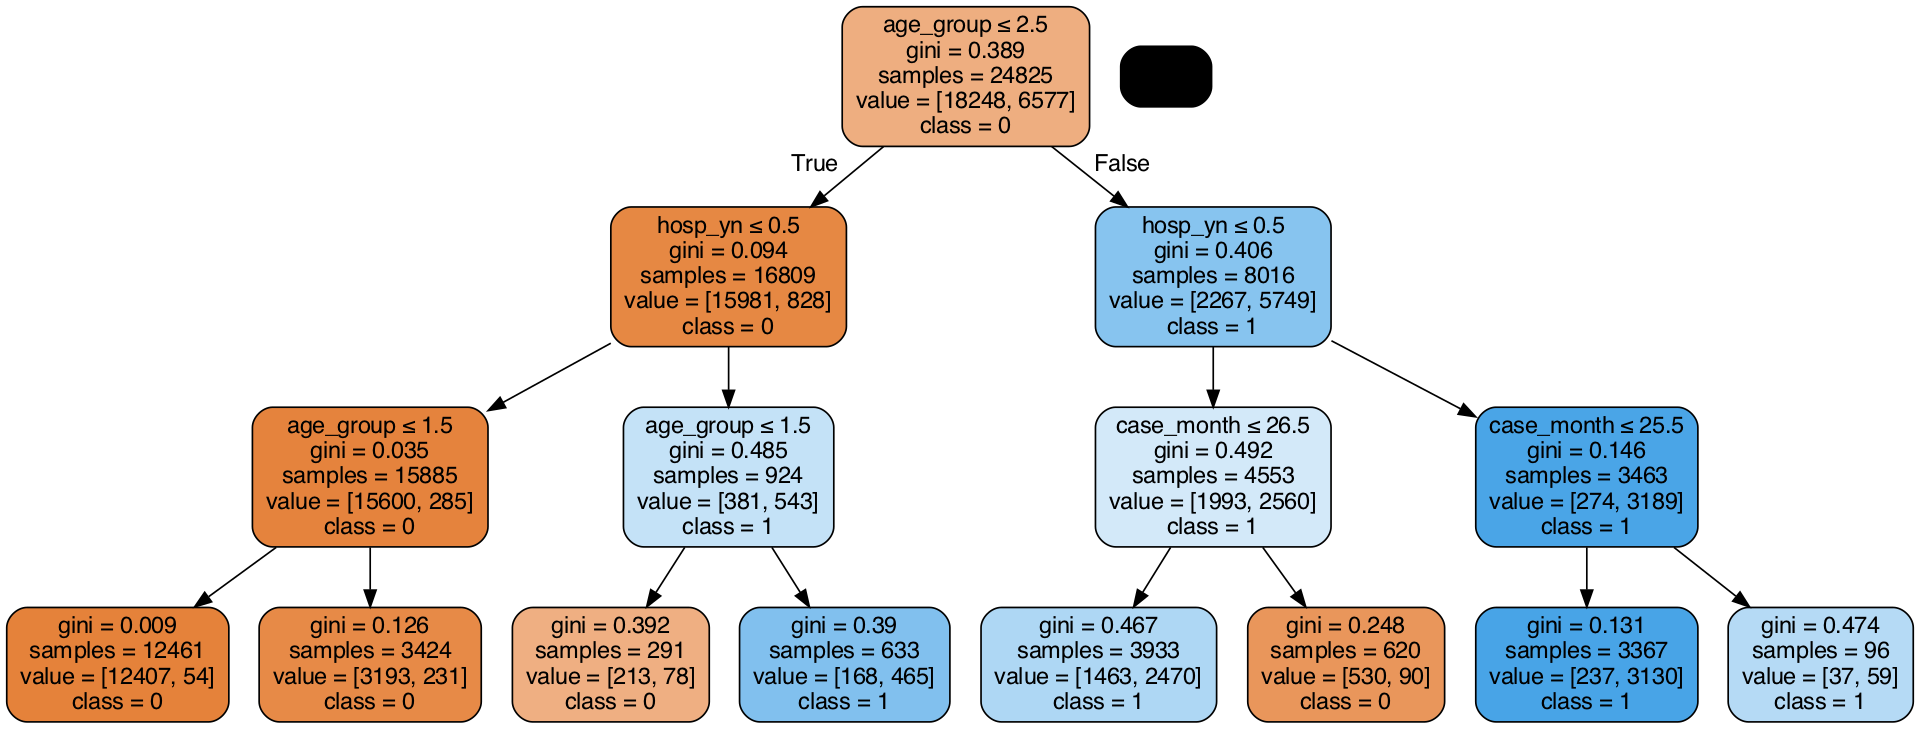

In [337]:
decision_tree = DecisionTreeClassifier(max_depth=3, random_state=1)
decision_tree.fit(random_forest_x_train, random_forest_y_train)

dot_data = export_graphviz(decision_tree, 
                           out_file=None, 
                           feature_names=random_forest_x_train.columns, 
                           class_names=['0', '1'],
                           filled=True, 
                           rounded=True, 
                           special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)

graph.set_size('"20,8!"')
Image(graph.create_png())

In [314]:
feature_importance = pd.DataFrame({'Feature': random_forest_x_train.columns, 'Significance':rfc.feature_importances_})
feature_importance.sort_values('Significance', ascending=False)

,Feature,Significance
1,age_group,0.537358
2,hosp_yn,0.301937
0,case_month,0.129947
3,icu_yn,0.026915
4,underlying_conditions_yn,0.003842


## Observations:

1. <b>Age Group here</b> leads the way in terms of feature importance, such that it is the dominant feature in terms of its contribution to the prediction model. It has an importance value of 0.537, which is significantly higher than the second most important feature, <b>hospitalisation Status</b>, with an importance value of 0.302. This matches our previous analysis where we observed that those who belonged to the oldest age bracket were the most exposed group to COVID, and resulted in the highest amount deaths.
2. <b>Hospitalisation Status</b> is our second most important feature and from previous analysis we have observed the high correlation between hospitlisation and the target feature. Here our models weights this feature quite heavily, which follows our previous observations and analysis; those who were admitted to hospital for COVID more than likely had a more serious case of COVID19 than those who were not admited to hospital. 
3. <b>Case Month</b> is weighted more highly here than it has been in other models. This is quite interesting, as earlier we posited that case month could potentially serve as  a proxy for COVID virus lethality (given the continuous evolution and mutation of the dominant COVID pathogen) and general vaccination rates (US vaccine program began in December 2020). While this is somewhat supposition, it is interesting that our model has picked up on this feature as being more imporant than both <b>ICU Status</b> and <b>Underlying Conditions</b>
4. Intersting that both <b>ICU Status</b> and <b>Underlying Conditions</b> were weighted quite lowly in this model. Again, this seems counter-intuitive as these are both important factors in determining the severity of COVID-19 cases. However, it's important to note that feature importance in a machine learning model is relative to the other features included in the model. So, while ICU status and underlying conditions may be important factors in determining the severity of COVID-19 cases, they may not be the most important factors in relation to the other features included in the model. It's also possible that the data used to train the model did not have a strong enough relationship between ICU status/underlying conditions and the target variable (severity) for these features to have a high weight in the model.

## 4.3.1

Here we print the predicted target feature value for the first 10 training examples, and the predicted class for the first 10 training examples.

In [331]:
random_forest_y_train_pred_10 = rfc.predict_proba(random_forest_x_train)[:, 1][:10]
random_forest_y_train_pred_class_10 = (rfc.predict(random_forest_x_train[:10]) > 0.5).astype(int)

random_forest_output_df = pd.DataFrame({
    "Predicted Values": random_forest_y_train_pred_10,
    "Predicted Class": random_forest_y_train_pred_class_10
})

print(random_forest_output_df)


   Predicted Values  Predicted Class
0          0.072187                0
1          0.927527                1
2          0.000000                0
3          0.977830                1
4          0.000000                0
5          0.007110                0
6          0.896018                1
7          0.000000                0
8          0.000000                0
9          0.927527                1


## 4.3.2 

Here we print a few classification evaluation measures computed on the full training set

In [335]:
# predict target feature values for full training set
random_forest_y_train_pred = rfc.predict_proba(random_forest_x_train)[:, 1]

# threshold predicted target feature values at 0.5 to get predicted class for full training set
random_forest_y_train_pred_class = (random_forest_y_train_pred >= 0.5).astype(int)

random_forest_accuracy_train = accuracy_score(random_forest_y_train, random_forest_y_train_pred_class)
random_forest_confusion_train = confusion_matrix(random_forest_y_train, random_forest_y_train_pred_class)
random_forest_precision_train = precision_score(random_forest_y_train, random_forest_y_train_pred_class)
random_forest_recall_train = recall_score(random_forest_y_train, random_forest_y_train_pred_class)
random_forest_f1_train = f1_score(random_forest_y_train, random_forest_y_train_pred_class)

print("\nEvaluation metrics on the training set:")
print("Accuracy: {:.2f}".format(random_forest_accuracy_train))
print("Precision: {:.2f}".format(random_forest_precision_train))
print("Recall: {:.2f}".format(random_forest_recall_train))
print("F1 score: {:.2f}".format(random_forest_f1_train))
print()
print("Confusion matrix:\n", random_forest_confusion_train)



Evaluation metrics on the training set:
Accuracy: 0.91
Precision: 0.81
Recall: 0.89
F1 score: 0.84

Confusion matrix:
 [[16843  1405]
 [  747  5830]]


### Observations:

Based on the provided evaluation metrics, the model seems to perform well on the training set. 

1. The <b>accuracy</b> of 0.91 indicates that the model predicted correctly 91% of the time. 
2. <b>Precision</b> is a measure of how many of the instances that the model predicted as positive were actually positive. In other words, it measures how many true positives the model predicted out of all the instances it predicted as positive. A precision score of 0.81 means that out of all the instances that the model predicted as positive, only 81% of them were actually positive.
3. <b>Recall</b> is a measure of how many of the actual positive instances the model correctly identified. In other words, it measures how many true positives the model predicted out of all the actual positive instances. A recall score of 0.89 means that the model correctly identified 89% of all the actual positive instances.
4. The <b>F1 Score</b> of 0.84 is a harmonic mean of precision and recall, which is a useful metric when there is an imbalance in the number of instances of each class. In this case, the F1 score indicates a good balance between precision and recall.
5. Our <b>Confusion Matrix</b> is a visualisation of the distribution of correct and incorrect predictions across the two classes in table format. In this case, the model made 16843 true negative predictions, 1405 false negative predictions, 747 false positive predictions, and 5830 true positive predictions. The large number of true negatives and true positives indicates that the model is doing well in correctly identifying both negative and positive instances. However, the relatively high number of false negatives and false positives suggests that there is still room for improvement in the model. <b>In particular, we should pay attention to the False Negative value, as it is of paramount importance that we reduce the number of misdiagnoses for those who are vulnerable to COVID19</b>

In [318]:
print("Classification Report:\n", classification_report(random_forest_y_train, random_forest_y_train_pred_class))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94     18248
           1       0.81      0.89      0.84      6577

    accuracy                           0.91     24825
   macro avg       0.88      0.90      0.89     24825
weighted avg       0.92      0.91      0.91     24825



From the classification report, we can see that our model is more comfortable in predicting the negative class with a precision of 0.96 and a recall of 0.92. This means that among all the instances that the model predicted as negative, 96% of them were actually negative and the model correctly identified 92% of all actual negative instances.

However, our random forest classifier  model is less comfortable in predicting the positive class (class 1) with a precision of 0.81 and a recall of 0.89. Only 81% of them were actually positive and the model correctly identified 89% of all actual positive instances. 

In comparison with the other models, despite the random forest classifier's higher overall accuracy, it has a lower accuracy than linear regression and logistic regression when attempting to predict the positive class. As this is our priority we should always bear this in mind when evalutating the performance of our models.

## Random Forest Regressor - Additional Model

In [319]:
random_forest_reg_x_train = train[['case_month', 'age_group', 'hosp_yn', 'icu_yn', 'underlying_conditions_yn']]
random_forest_reg_y_train = train['death_yn']

random_forest_reg_x_test = test[['case_month', 'age_group', 'hosp_yn', 'icu_yn', 'underlying_conditions_yn']]
random_forest_reg_y_test = test['death_yn']

In [320]:
rfr = RandomForestRegressor() # create instance of the model
rfr.fit(random_forest_reg_x_train, random_forest_reg_y_train) # fit the model to the training data

random_forest_reg_y_pred = rfr.predict(random_forest_reg_x_test)

#Evaluate the performance of your model:
random_forest_reg_mse = mean_squared_error(random_forest_reg_y_test, random_forest_reg_y_pred)
print("Mean Squared Error:", random_forest_reg_mse)

random_forest_reg_score = rfr.score(random_forest_reg_x_test, random_forest_reg_y_test)
print(f"R^2 score on testing data: {random_forest_reg_score}")

Mean Squared Error: 0.062482921217316745
R^2 score on testing data: 0.6761236019938273


In [321]:
random_forest_reg_y_train_pred_10 = rfr.predict(random_forest_reg_x_train)[:10]
print("Predicted target feature values for the first 10 training examples:\n", random_forest_reg_y_train_pred_10)
print()
random_forest_reg_y_train_pred_class_10 = (rfr.predict(random_forest_reg_x_train[:10]) > 0.5).astype(int)
print("Predicted class for the first 10 training examples:\n", random_forest_reg_y_train_pred_class_10)

Predicted target feature values for the first 10 training examples:
 [0.07045817 0.92553747 0.         0.97710227 0.         0.0068974
 0.90144981 0.         0.         0.92553747]

Predicted class for the first 10 training examples:
 [0 1 0 1 0 0 1 0 0 1]


In [322]:
# predict target feature values for full training set
random_forest_reg_y_train_pred = rfr.predict(random_forest_reg_x_train)

# threshold predicted target feature values at 0.5 to get predicted class for full training set
random_forest_reg_y_train_pred_class = (random_forest_reg_y_train_pred >= 0.5).astype(int)

random_forest_reg_accuracy_train = accuracy_score(random_forest_reg_y_train, random_forest_reg_y_train_pred_class)
random_forest_reg_confusion_train = confusion_matrix(random_forest_reg_y_train, random_forest_reg_y_train_pred_class)
random_forest_reg_precision_train = precision_score(random_forest_reg_y_train, random_forest_reg_y_train_pred_class)
random_forest_reg_recall_train = recall_score(random_forest_reg_y_train, random_forest_reg_y_train_pred_class)
random_forest_reg_f1_train = f1_score(random_forest_reg_y_train, random_forest_reg_y_train_pred_class)

print("\nEvaluation metrics on the training set:")
print()
print("Accuracy: {:.2f}".format(random_forest_reg_accuracy_train))
print("Confusion matrix:\n", random_forest_reg_confusion_train)
print("Precision: {:.2f}".format(random_forest_reg_precision_train))
print("Recall: {:.2f}".format(random_forest_reg_recall_train))
print("F1 score: {:.2f}".format(random_forest_reg_f1_train))


Evaluation metrics on the training set:

Accuracy: 0.91
Confusion matrix:
 [[16845  1403]
 [  750  5827]]
Precision: 0.81
Recall: 0.89
F1 score: 0.84


In [323]:
print("Classification Report:\n", classification_report(random_forest_reg_y_train, random_forest_reg_y_train_pred_class))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94     18248
           1       0.81      0.89      0.84      6577

    accuracy                           0.91     24825
   macro avg       0.88      0.90      0.89     24825
weighted avg       0.92      0.91      0.91     24825



# Part 5

## 5.2

### How to improve: 

paragraph on each of the below

1. Feature Selection
2. Creating New Features
3. Combining Predictive Models
4. Revised Splitting protocol
5. Feature Rescaling
6. Feature Ranking